In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sq3
import UCSC_spec_db_interaction as UCSC_db
import sys
import os
import scipy.signal
from astropy.io import fits
from dust_extinction.parameter_averages import F99
import astropy.units as u
import pandas as pd
import glob
import copy

# Query Database for a specific host and grab apertures with physical size

PS17bii-combined-20180208_ap1_1.0_kpc_BAD.fits
PS17bii-combined-20180208_ap2_1.0_kpc_SN_BAD.fits
PS17bii-combined-20180208_ap3_1.5_kpc_BAD.fits
PS17bii-combined-20180208_ap4_1.5_kpc_SN_BAD.fits
PS17bii-combined-20180208_ap5_2.0_kpc_BAD.fits
PS17bii-combined-20180208_ap6_2.0_kpc_SN_BAD.fits
PS17bii-combined-20180208_ap7_3.0_kpc.fits
PS17bii-combined-20180208_ap8_3.0_kpc_SN.fits
PS17bii-combined-20180208_ap9_13.85_rkron.fits
9 Total Spectra found


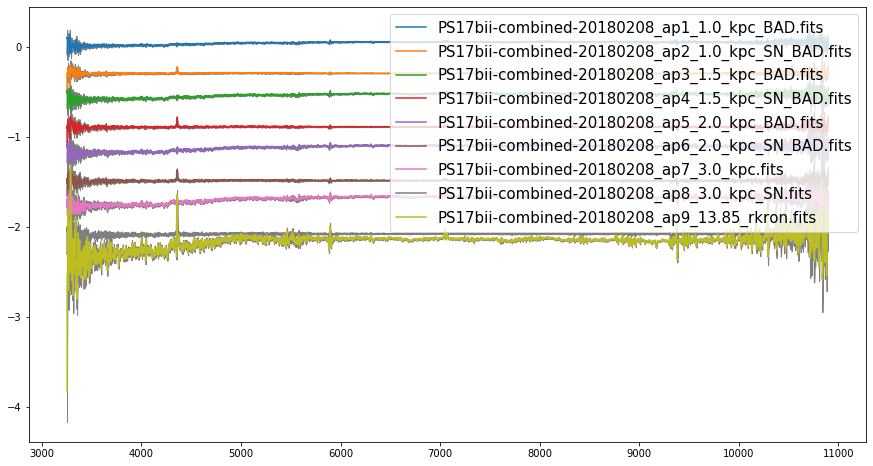

In [3]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/UCSC_spec_database/UCSC_spec_db')
#ran:
# #20180710 - LRIS
# test_query = "SELECT * from SPECTRA where OBJECT like '%15pr%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15cge%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# # ##test_query = "SELECT * from SPECTRA where OBJECT like '%17bs%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# # ##test_query = "SELECT * from SPECTRA where OBJECT like '%17drh%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"

# # #20180611 - LRIS
# test_query = "SELECT * from SPECTRA where OBJECT like '%17hmf%' and FILENAME like '%combined-20180611%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16-efw%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15mg%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%18jh%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%17gfl%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"

# # #20180509 - LRIS
# test_query = "SELECT * from SPECTRA where OBJECT like '%17gav%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17hlt%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"

# # #20180115 - LRIS
# test_query = "SELECT * from SPECTRA where OBJECT like '%18kl%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17jxd%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and AP_SIZE < 2 and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where FILENAME like '%17dzg%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16ez%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# # ## test_query = "SELECT * from SPECTRA where OBJECT like '%16htm%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# # ## test_query = "SELECT * from SPECTRA where OBJECT like '%16agf%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"

# # #20180114 - LRIS
# test_query = "SELECT * from SPECTRA where OBJECT like '%15mt%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15pn%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17hoo%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"
# # ##test_query = "SELECT * from SPECTRA where OBJECT like '%17hju%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"
# # ##test_query = "SELECT * from SPECTRA where OBJECT like '%17glq%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"

# # # #20170823 - LRIS
# # ##test_query = "SELECT * from SPECTRA where OBJECT like '%16esh%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16cuv%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15cfn%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where FILENAME like '%16cvc%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16dnp%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# # ##test_query = "SELECT * from SPECTRA where OBJECT like '%15bzz%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16bwu%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%CSS161013%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16grz%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"

# # #20171115 - LRIS
# # ##test_query = "SELECT * from SPECTRA where OBJECT like '%16bba%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# # ##test_query = "SELECT * from SPECTRA where OBJECT like '%16ije%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"

# # #20170402 - Kast
# test_query = "SELECT * from SPECTRA where OBJECT like '%15fa%' and FILENAME like '%combined%' and FILENAME not like '%_SN.fits%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15hg%' and FILENAME like '%combined%' and FILENAME not like '%_SN.fits%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15jt%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15la%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15lu%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15mi%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15nr%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15so%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16av%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16lg%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16cpu%' and FILENAME like '%combined%' and FILENAME not like '%_SN.fits%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15bdr%' and FILENAME like '%combined%' and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15zn%' and FILENAME like '%combined%' and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16cqa%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16el%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%PSNJ0859349%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%PSNJ1602512%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%PSNJ1628383%' and FILENAME like '%combined%'"

# #20180206 - Kast
# test_query = "SELECT * from SPECTRA where OBJECT like '%16afk%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17ms%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16aer%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17dfq%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17ajs%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16coj%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17hn%' and FILENAME like '%combined%'"
# # ##test_query = "SELECT * from SPECTRA where OBJECT like '%17ckg%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17oz%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17mf%' and FILENAME like '%combined%'"

# #20191125 - LRIS
# test_query = "SELECT * from SPECTRA where OBJECT like '%18koy%' and FILENAME like '%combined%' and FILENAME like '%kron%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17hhz%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17iuw%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%19iyw%' and FILENAME like '%combined%'" #obj name wrong in fits
# test_query = "SELECT * from SPECTRA where OBJECT like '%19aox%' and FILENAME like '%combined%'"
# # # ##test_query = "SELECT * from SPECTRA where OBJECT like '%19nwf%' and FILENAME like '%combined%'"
# # # ##test_query = "SELECT * from SPECTRA where OBJECT like '%16kz%' and FILENAME like '%combined%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17ajt%' and FILENAME like '%combined%'"

# #20180206 - Kast
test_query = "SELECT * from SPECTRA where OBJECT like '%17bii%' and FILENAME like '%combined%'"

# # #tests
# # test_query = "SELECT * from SPECTRA where OBJECT like '%15jt%' and FILENAME like '%combined%' and FILENAME not like '%_SN.fits%' and FILENAME like '%rkron%'"
# # test_query = "SELECT * from SPECTRA where OBJECT like '%2016afk%' and FILENAME like '%combined%' and FILENAME like '%rkron%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15cge%' and FILENAME like '%combined%' and FILENAME like '%3.0_kpc.%'"
spectra = UCSC_db.query_and_plot(test_query)
# spectra = UCSC_db.query_and_plot(test_query, xlim=[4000,5000],ylim=[0.0,.11])


# Get MW dust and correct spectra using Rv = 3.1 (doing in firefly now)

In [115]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/firefly_release/')
from python import firefly_dust
# sn_dust = {}
# for spec in spectra:
#     if spec.meta_dict['OBJECT'] not in sn_dust:
#         ebv_mw = firefly_dust.get_dust_radec(spec.meta_dict['RA'],spec.meta_dict['DEC'],'ebv')
#         sn_dust[spec.meta_dict['OBJECT']] = ebv_mw
#         print (spec.meta_dict['OBJECT'], ebv_mw)
# for spec in spectra:
#     if spec.meta_dict['OBJECT'] in sn_dust:
#         print ('Correcting MW ext for', spec.meta_dict['FILENAME'])
#         spec.flux_dered_mw = spec.flux/ext.extinguish(spec.wavelength*u.AA, Av=3.1*sn_dust[spec.meta_dict['OBJECT']])
#         spec.err_dered_mw = spec.err/ext.extinguish(spec.wavelength*u.AA, Av=3.1*sn_dust[spec.meta_dict['OBJECT']])

SyntaxError: unexpected EOF while parsing (<ipython-input-115-c83769a328ea>, line 15)

In [120]:
ext = F99(Rv=3.1)
print (ext.extinguish(6562.79*u.AA, Ebv = .1))

0.8048431614641111


# Take the largest aperture
# Estimate a pseudo continuum using a median filter
# Measure the Balmer decrement with gaussian line fitting

# Ignoring for now

In [96]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/nebular_fitting/')
import line_fitting_tools as tools

# for spec in spectra:
#     spec.wave_dered = spec.wavelength/(1.+z)
#     if 'rkron' in spec.meta_dict['FILENAME']:
#         flux_filt = scipy.signal.medfilt(spec.flux_dered_mw, kernel_size=41) #caveat: assuming no uncertainty here
#         neb_flux = spec.flux_dered_mw-flux_filt
#         mgaus_solved, w_range, fit_lines = tools.fit_galaxy([spec.wave_dered, neb_flux, 3.*spec.err_dered_mw])
#         h_ratio = mgaus_solved[2]['H_a_6562']/mgaus_solved[2]['H_b_4861']
#         ebv_gal = tools.calc_ebv_from_H_decrement(h_ratio)
#         tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [3650, 3800])
#         tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [4750, 5100])
#         tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [6500, 6800])
#         print (spec.meta_dict['FILENAME'], h_ratio, ebv_gal)
        

#         for line in fit_lines:
#             if line.parent_line is None:
#                 print (line.name)
#                 print ('Amplitude:', np.round(line.a,4))
#                 print ('Velocity (km/s):', np.round(line.vel,4))
#                 print ('Velocity width(km/s):', np.round(line.v_width,2))
#                 if line.skew != None:
#                     print ('Skewness width(km/s):', np.round(line.skew,2))
#                 else:
#                     print ('Skewness width(km/s):', ' None')
    

In [97]:
# approx_z = 0.0456054

# for spec in spectra:
#     spec.wave_dered = spec.wavelength/(1.+approx_z)
#     wave_min = 3700
#     wave_max = 6800
#     roi = (spec.wavelength > wave_min) & (spec.wavelength < wave_max)
#     scale_factor = (1./np.amax(spec.flux[roi]))
#     spec.flux = spec.flux*scale_factor
#     spec.err = spec.err*scale_factor
#     flux_filt = scipy.signal.medfilt(spec.flux, kernel_size=41) #caveat: assuming no uncertainty here

#     neb_flux = spec.flux-flux_filt
#     fit_output  = tools.fit_lines([spec.wave_dered, neb_flux, 3.*spec.err],wave_range=[3700,6800], s_f = False)
#     mgaus_solved = fit_output[1]
#     w_range = fit_output[8]
#     neb_flux = fit_output[7]
#     fit_lines = fit_output[3]
#     tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [3650, 3800])
#     tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [4750, 5100])
#     tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [6500, 6800])
#     spec.flux_wo_em = neb_flux - (mgaus_solved[0])+flux_filt
#     plt.figure(figsize=[16,8])
#     plt.plot(spec.wave_dered, spec.flux_wo_em)
#     plt.show()

PS17ajt_host-combined-20191126_ap7_3.0_kpc.fits
Fitting...


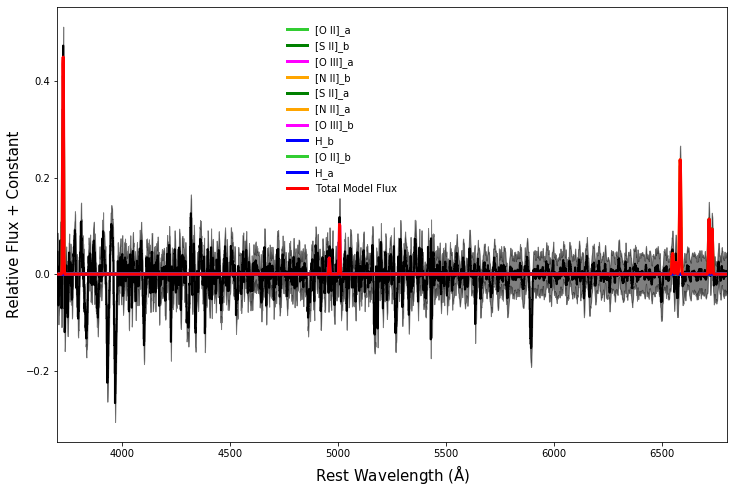

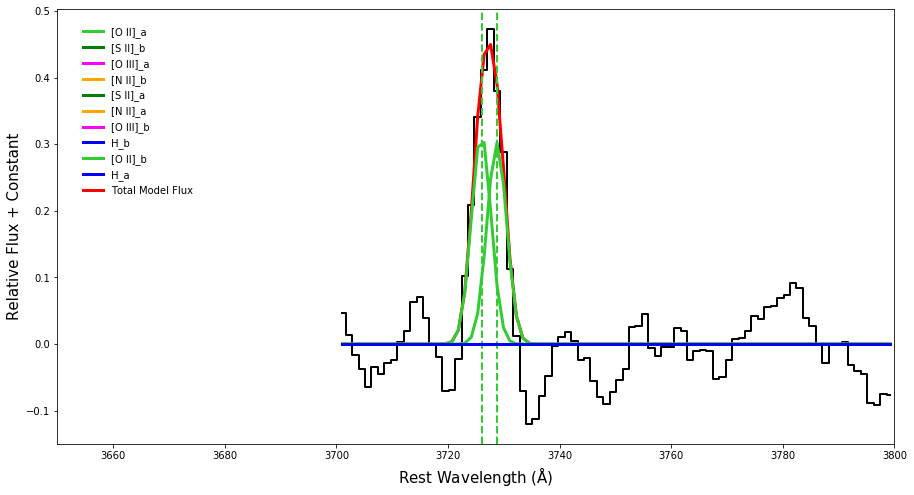

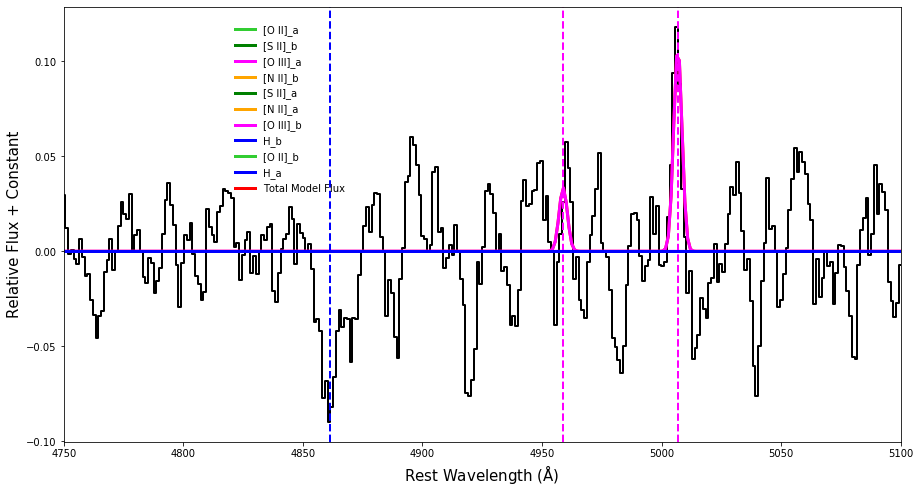

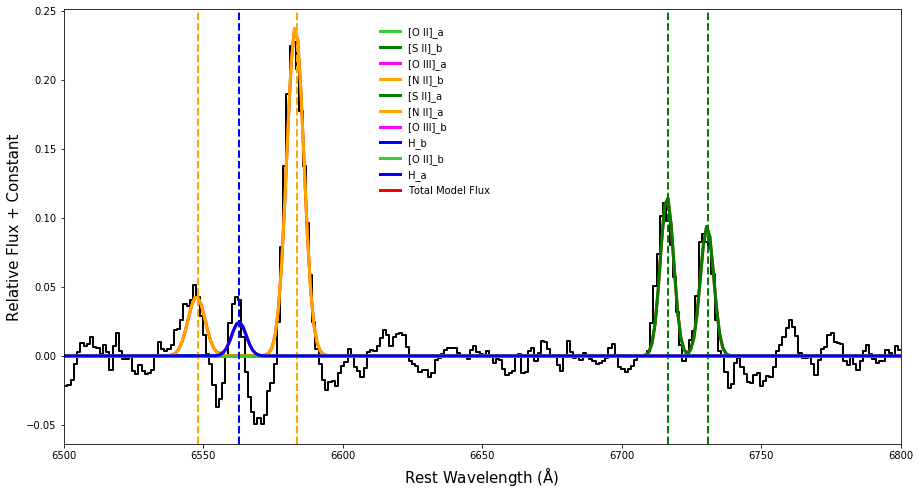

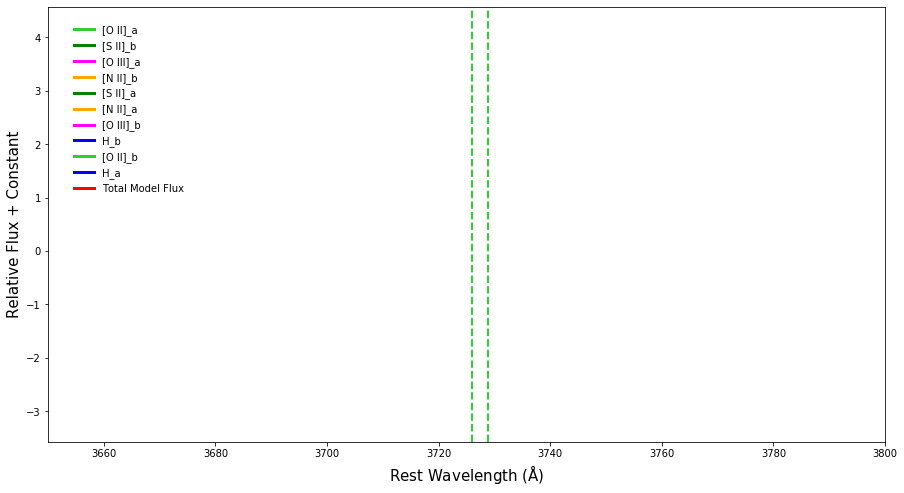

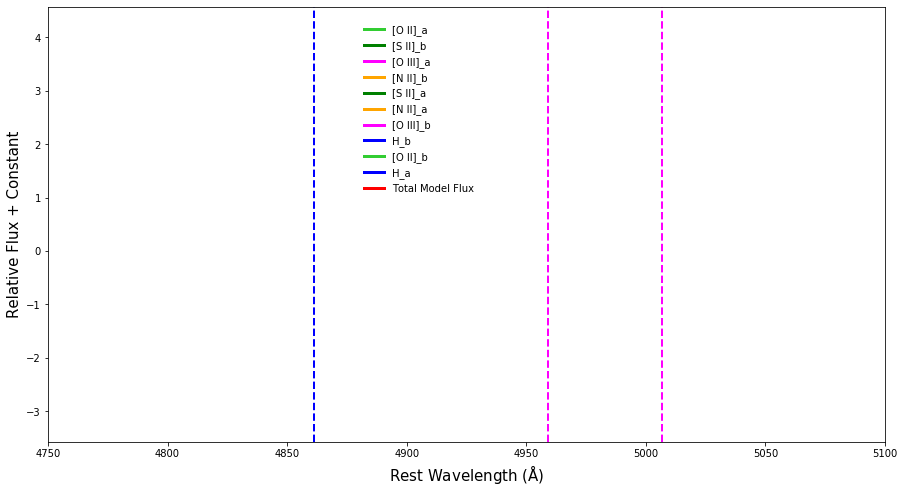

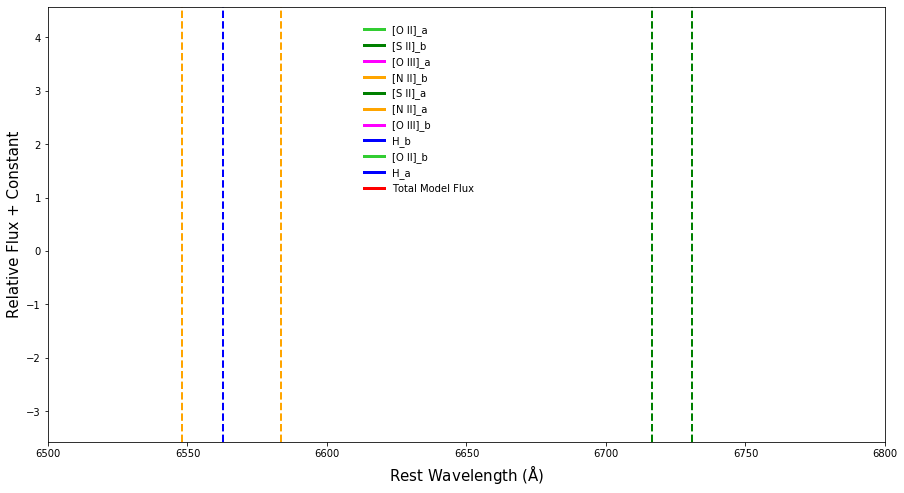

In [100]:
approx_z = 0.027

for spec in spectra:
    spec.wave_dered = spec.wavelength/(1.+approx_z)
#     if 'rkron' in spec.meta_dict['FILENAME']:
#     if '3.0_kpc' in spec.meta_dict['FILENAME']:
    if '3.0_kpc' in spec.meta_dict['FILENAME'] and '_SN' not in spec.meta_dict['FILENAME']:
        print (spec.meta_dict['FILENAME'])
#     if '1.5_kpc' in spec.meta_dict['FILENAME'] and '_SN' not in spec.meta_dict['FILENAME']:
        wave_min = 3700
        wave_max = 6800
        roi = (spec.wavelength > wave_min) & (spec.wavelength < wave_max)
        scale_factor = (1./np.amax(spec.flux[roi]))
        spec.flux = spec.flux*scale_factor
        spec.err = spec.err*scale_factor
        flux_filt = scipy.signal.medfilt(spec.flux, kernel_size=41) #caveat: assuming no uncertainty here
        
        neb_flux = spec.flux-flux_filt
        fit_output  = tools.fit_lines([spec.wave_dered, neb_flux, 3.*spec.err],wave_range=[3700,6800], s_f = False)
        mgaus_solved = fit_output[1]
        w_range = fit_output[8]
        neb_flux = fit_output[7]
        fit_lines = fit_output[3]
        tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [3650, 3800])
        tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [4750, 5100])
        tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [6500, 6800])
        


In [675]:
# plt.figure(figsize=[16,8])
# plt.plot(w_range, neb_flux_interp)
# plt.plot(w_range, mgaus_solved[0])
# plt.plot(w_range, neb_flux-mgaus_solved[0])
# plt.xlim([6500,6600])
# # plt.ylim([-.1,.3])
# plt.show()
# plt.figure(figsize=[16,8])
# plt.plot(w_range, neb_flux - (mgaus_solved[0])+flux_filt)
# # plt.xlim([6200,6800])
# # plt.ylim([.1,.3])
# plt.show()
# plt.figure(figsize=[16,8])
# plt.plot(w_range, neb_flux - (mgaus_solved[0])+flux_filt)
# plt.xlim([4000,6800])
# # plt.ylim([.1,.3])
# plt.show()

In [101]:
# good_lines_for_z = ['[O III]_a', 'H_a',  '[O II]_a']
# good_lines_for_z = ['[N II]_a', 'H_a',  '[O II]_a']
# good_lines_for_z = ['[N II]_a', 'H_a',  '[S II]_a'] 
# good_lines_for_z = ['[O II]_a', 'H_a']
# good_lines_for_z = ['[N II]_a', '[O II]_a'] 
good_lines_for_z = ['[O II]_a', '[N II]_a', '[S II]_a']
# good_lines_for_z = ['[N II]_a', '[S II]_a']
# good_lines_for_z = [ 'H_a',  '[S II]_a', '[O III]_a', '[O II]_a'] 
# good_lines_for_z = [ 'H_a',  '[S II]_a', '[O II]_a', '[N II]_a']
# good_lines_for_z = ['[N II]_a', 'H_a',  '[O II]_a', '[S II]_a', '[O III]_a'] #one per element
# good_lines_for_z = [ 'H_a',  '[O II]_a', '[S II]_a', '[O III]_a']
# good_lines_for_z = []
z_array = []
for line in fit_lines:
    if line.parent_line is None:
        if line.name in good_lines_for_z:
            print (line.name) 
            print ('Amplitude:', np.round(line.a,4))
            print ('Velocity (km/s):', np.round(line.vel,4))
            print ('Velocity width(km/s):', np.round(line.v_width,2))
            center_wave = tools.calculate_wave_from_velocity(line.vel, line.rest_wave)
            print ('Center Wave (A):', center_wave*(1.+approx_z))
            real_z = (center_wave*(1.+approx_z)/line.rest_wave) - 1
            print ('Real z:', real_z)
            z_array.append(real_z)
if len(z_array) == 0:
    z = approx_z
else:
    z = np.average(z_array)
print ('Final z measurement for fitting: ', z)

[O II]_a
Amplitude: 0.3025
Velocity (km/s): -6.2726
Velocity width(km/s): 141.79
Center Wave (A): 3826.5547991901767
Real z: 0.02697851204449564
[N II]_a
Amplitude: 0.0425
Velocity (km/s): -20.6086
Velocity width(km/s): 139.73
Center Wave (A): 6724.3850799447755
Real z: 0.02692940340174177
[S II]_a
Amplitude: 0.1142
Velocity (km/s): -9.2408
Velocity width(km/s): 106.24
Center Wave (A): 6897.571266446983
Real z: 0.02696834430844075
Final z measurement for fitting:  0.026958753251559386


-20.73195113342081 15.286500427246095
15.28650042724609
PS17ajt_host-combined-20191126_ap1_1.0_kpc.fits


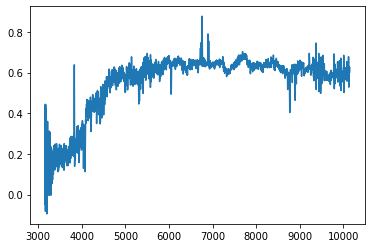

PS17ajt_host-combined-20191126_ap2_1.0_kpc_SN.fits


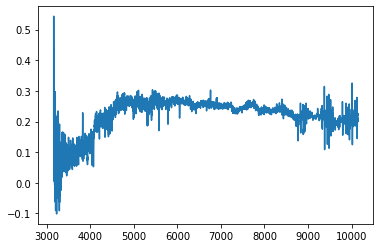

PS17ajt_host-combined-20191126_ap3_1.5_kpc.fits


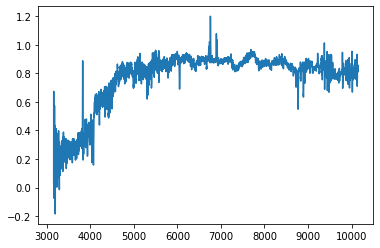

PS17ajt_host-combined-20191126_ap4_1.5_kpc_SN.fits


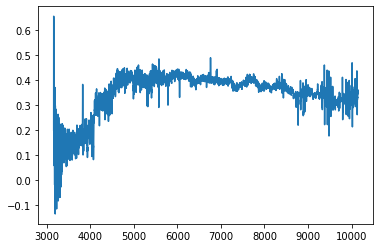

PS17ajt_host-combined-20191126_ap5_2.0_kpc.fits


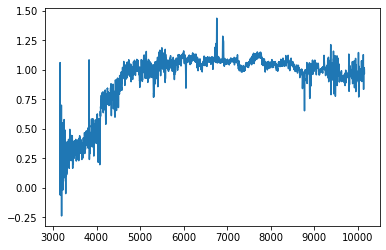

PS17ajt_host-combined-20191126_ap6_2.0_kpc_SN.fits


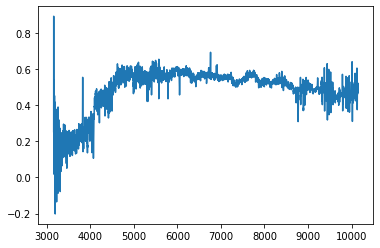

PS17ajt_host-combined-20191126_ap7_3.0_kpc.fits


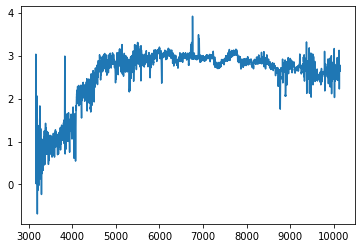

PS17ajt_host-combined-20191126_ap8_3.0_kpc_SN.fits


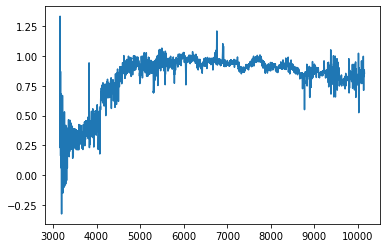

PS17ajt_host-combined-20191126_ap9_13.22_rkron.fits


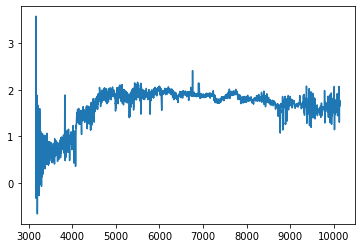

In [102]:
import pyphot
host_ps1_df = pd.read_csv('/Users/msiebert/Documents/UCSC/Research/Foundation_Hosts/host_ps1_data.csv')
for spec in spectra:
#     if '1.5_kpc' in spec.meta_dict['FILENAME']:
    if 'rkron' in spec.meta_dict['FILENAME']:
        host_name = spec.meta_dict['FILENAME'].split('-')[0]
        if 'ASASSN' in host_name:
            host_name = 'ASASSN-'+host_name.split('ASASSN')[1].split('_')[0]
        if '_' in host_name:
            host_name = host_name.split('_')[0]
        if 'PTSS16' in host_name:
            host_name = 'PTSS-16efw'
        if 'SN2017hlt' in host_name:
            host_name = '2017hlt'
        if 'sn2018kl' in host_name:
            host_name = '2018kl'
        if 'AT2017hoo' in host_name:
            host_name = '2017hoo'
        if '2016afk' in host_name:
            host_name = '2016afk'
        if '2017dfq' in host_name:
            host_name = '2017dfq'
        host_ind = list(host_ps1_df['name'].values).index(host_name)
        r_int = host_ps1_df['rmag'][host_ind] - host_ps1_df['rext'][host_ind] #TODO:should use non-corrected?
        lib = pyphot.get_library()
        filt = 'SDSS_r'
        func = lib[filt]
        fflux = func.get_flux(spec.wavelength, spec.flux, axis = -1).value
        rmag = -2.5 * np.log10(fflux) - func.Vega_zero_mag
        print (rmag, r_int)
        r_diff = r_int - rmag
        scale = 10**(r_diff/(-2.5))
        fflux_new = func.get_flux(spec.wavelength, scale*spec.flux, axis = -1).value
        rmag_new = -2.5 * np.log10(fflux_new) - func.Vega_zero_mag
        print (rmag_new)
for spec in spectra:
    print (spec.meta_dict['FILENAME'])
    #firefly assumes flux units 10**(-15)
    spec.flux_scaled = scale*spec.flux/10**(-15)
#     spec.flux_wo_em_scaled = scale*spec.flux_wo_em/10**(-15)
    spec.err_scaled = scale*spec.err/10**(-15)
    plt.plot(spec.wavelength, spec.flux_scaled)
    plt.show()

# Correct for host galaxy extinction (for now maybe better to fit host extinction with firefly)

In [103]:
# for spec in spectra:
#     print ('Correcting for host ext of E(B-V):', ebv_gal) 
#     spec.flux_dered_mw_gal = spec.flux_dered_mw/ext.extinguish(spec.wave_dered*u.AA, Av=3.1*ebv_gal)
#     spec.err_dered_mw_gal = spec.err_dered_mw/ext.extinguish(spec.wave_dered*u.AA, Av=3.1*ebv_gal)
#     plt.plot(spec.wave_dered, spec.flux)
#     plt.plot(spec.wave_dered, spec.flux_dered_mw_gal)
#     plt.show()

# Fit stellar continuum using firefly (hpf_mode = 'on' , and milky_way_reddening = True)

In [104]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/firefly_release/')
from run import firefly
from run import read_firefly
from scipy.interpolate import splrep,splev

In [105]:
for spec in spectra:
    print (spec.meta_dict['FILENAME'], spec.meta_dict['OBJECT'])
#         firefly.main(spec.wavelength, spec.flux_scaled, spec.err_scaled, z, spec.meta_dict['RA'], 
#                      spec.meta_dict['DEC'], vdisp=135.89957, res=5000, input_file = spec.meta_dict['FILENAME'].split('.fits')[0], 
#                      clobber=True)
#     firefly.main(spec.wavelength, spec.flux_scaled, spec.err_scaled, z, spec.meta_dict['RA'], 
#                  spec.meta_dict['DEC'], vdisp=135.89957, res=5000, input_file = spec.meta_dict['FILENAME'].split('.fits')[0], 
#                  clobber=False)
#     firefly.main(spec.wavelength, spec.flux_dered_mw_gal, spec.err_dered_mw_gal, z, spec.meta_dict['RA'], 
#                  spec.meta_dict['DEC'], vdisp=135.89957, res=5000, input_file = spec.meta_dict['FILENAME'].split('.fits')[0], clobber=False)

    #using spectrum with em lines removed
    firefly.main(spec.wavelength, spec.flux_scaled, spec.err_scaled, z, spec.meta_dict['RA'], 
                 spec.meta_dict['DEC'], vdisp=135.89957, res=5000, input_file = spec.meta_dict['FILENAME'].split('.fits')[0], 
                 clobber=True,clip_lines=True)
#     firefly.main(spec.wavelength, spec.flux_scaled, spec.err_scaled, z, spec.meta_dict['RA'], 
#                  spec.meta_dict['DEC'], vdisp=135.89957, res=5000, input_file = spec.meta_dict['FILENAME'].split('.fits')[0], 
#                  clobber=True,clip_lines=False)
    

PS17ajt_host-combined-20191126_ap1_1.0_kpc.fits PS17ajt_host

Starting firefly ...

Output file:  /Users/msiebert/Documents/UCSC/Research/firefly_release/output/spFly-PS17ajt_host-combined-20191126_ap1_1.0_kpc.fits

Clipping ['O-II', 'O-IIIa', 'O-IIIb', 'O-IIIc', 'H-β', 'S-II', 'Ha_N-II']
E(B-V)_MW =  0.025159476
getting the models, t= 1648844297.818997
Corrects from dust attenuation and fitting, Dt= 26.1441011428833 seconds
dust done, Dt= 41.14626216888428 seconds
fitting done, Dt= 56.246679067611694 seconds
Gets the best model, Dt= 56.24734902381897 seconds

Done... total time: 58 seconds.

PS17ajt_host-combined-20191126_ap2_1.0_kpc_SN.fits PS17ajt_host

Starting firefly ...

Output file:  /Users/msiebert/Documents/UCSC/Research/firefly_release/output/spFly-PS17ajt_host-combined-20191126_ap2_1.0_kpc_SN.fits

Clipping ['O-II', 'O-IIIa', 'O-IIIb', 'O-IIIc', 'H-β', 'S-II', 'Ha_N-II']
E(B-V)_MW =  0.025159476
getting the models, t= 1648844356.1004689
Corrects from dust attenuation and fi

# Visualize continuum fits, remove large scale differences with median filter, save output to fits

PS17ajt_host-combined-20191126_ap1_1.0_kpc.fits
age: 8.46 Gyr
[Z/H]: -0.2 dex
log M/Msun: 9.77
E(B-V): 0.03 mag


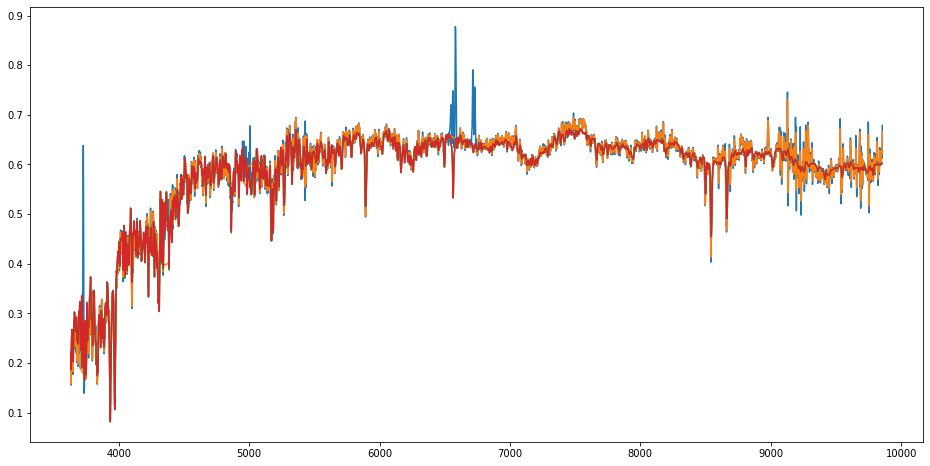

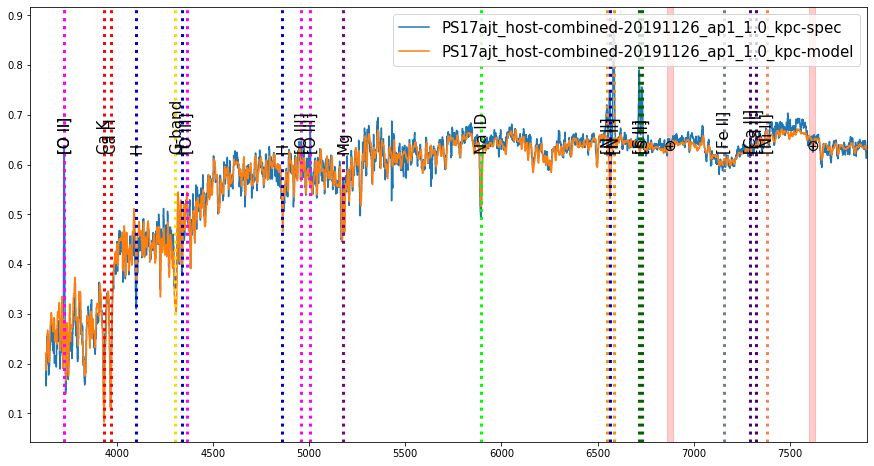

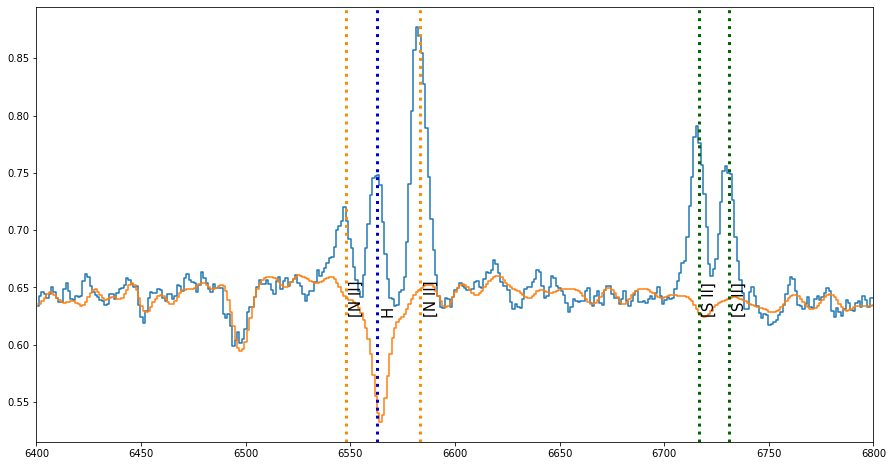

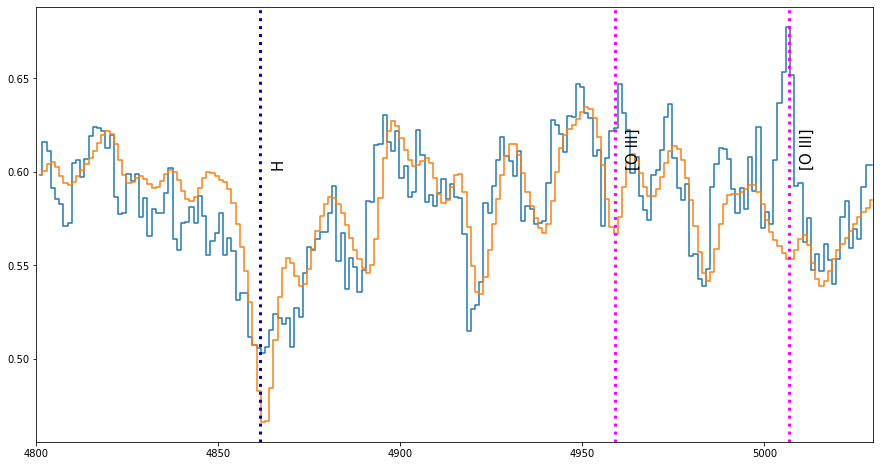

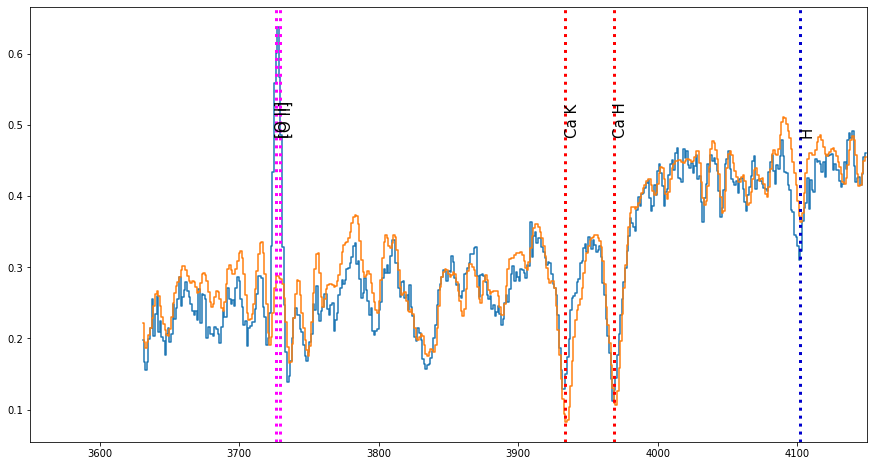

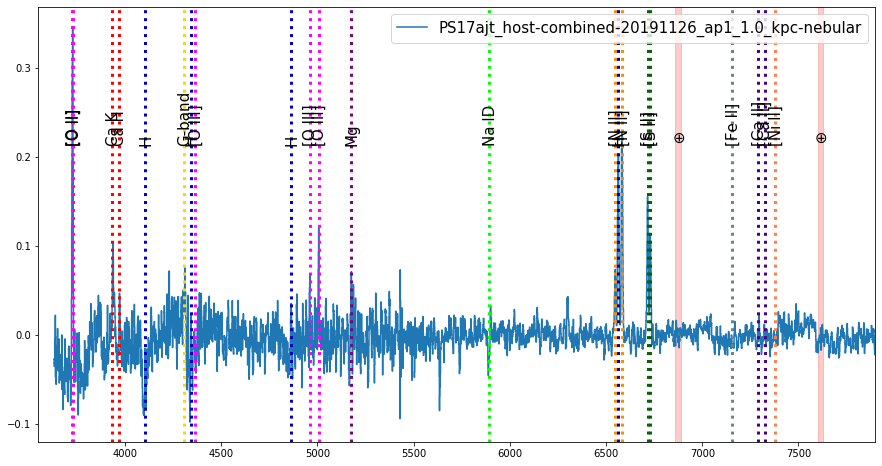

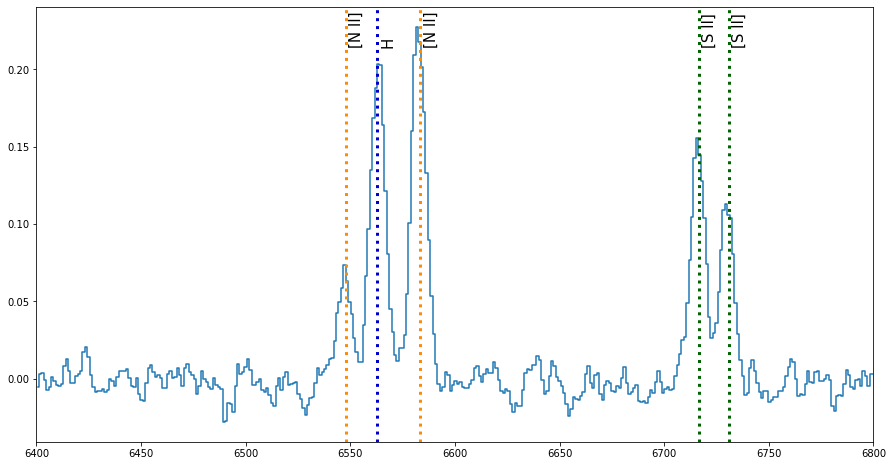

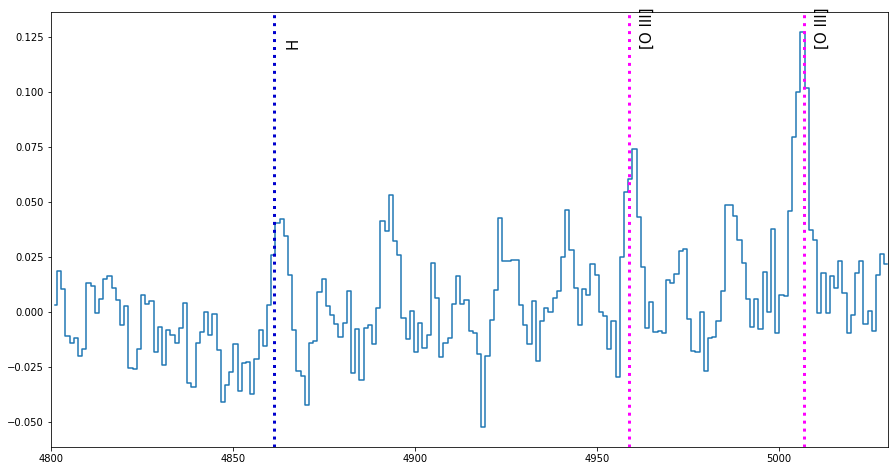

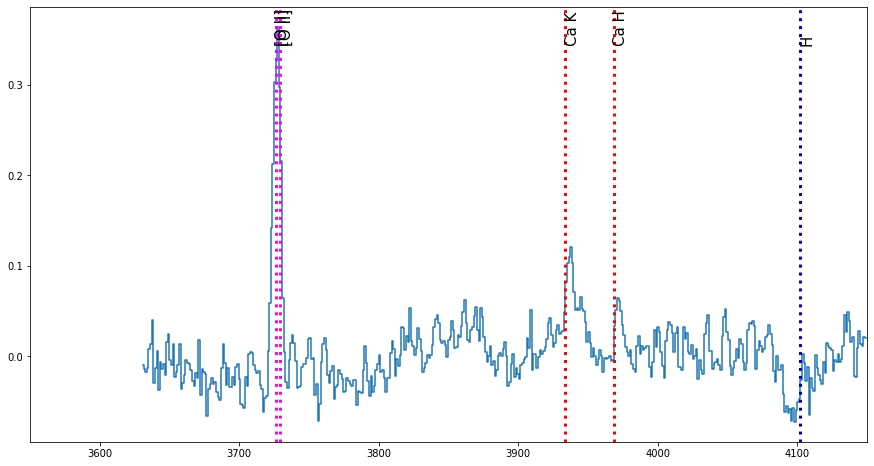

Median continuum:  0.6174885827149266
Median residual:  0.0025806416951518196
Residual fraction:  0.4179254106700162 %


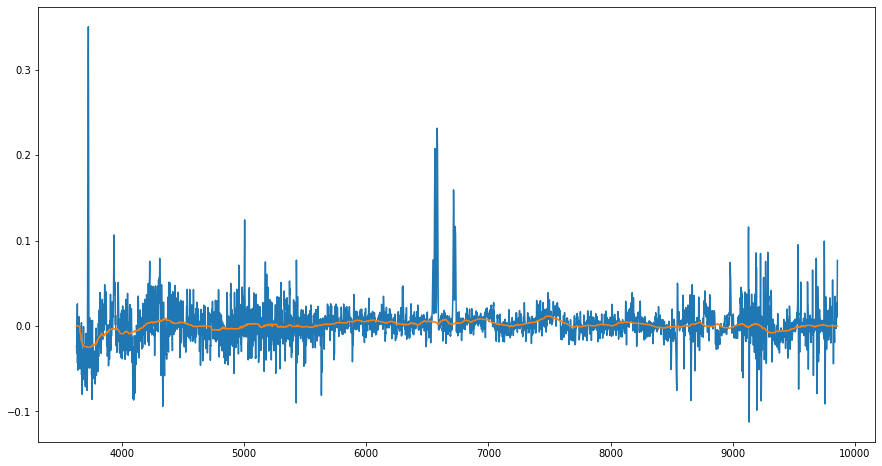

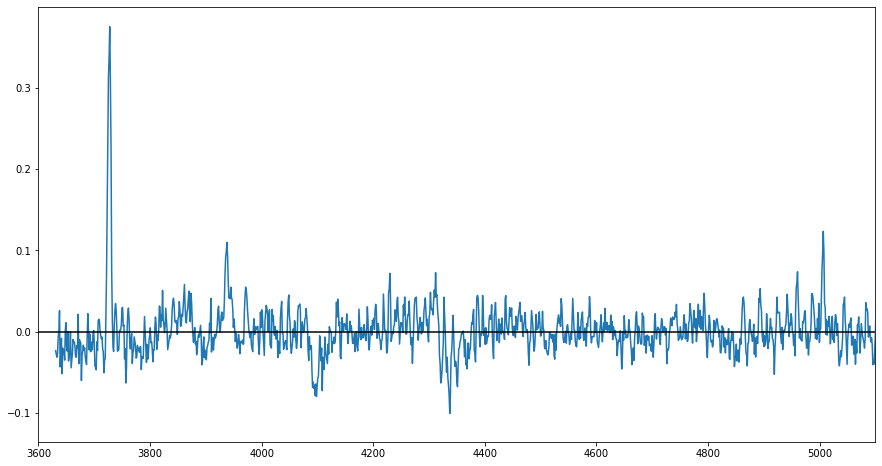

PS17ajt_host-combined-20191126_ap2_1.0_kpc_SN.fits
age: 12.16 Gyr
[Z/H]: -0.37 dex
log M/Msun: 9.51
E(B-V): 0.0 mag


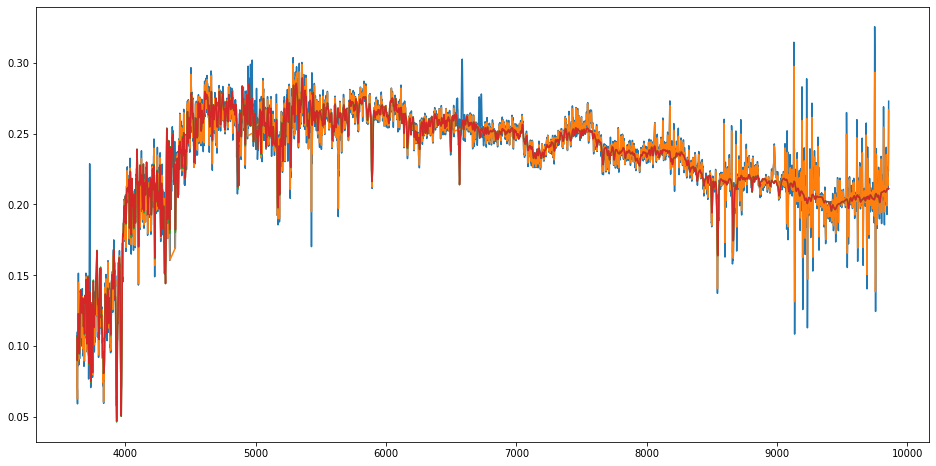

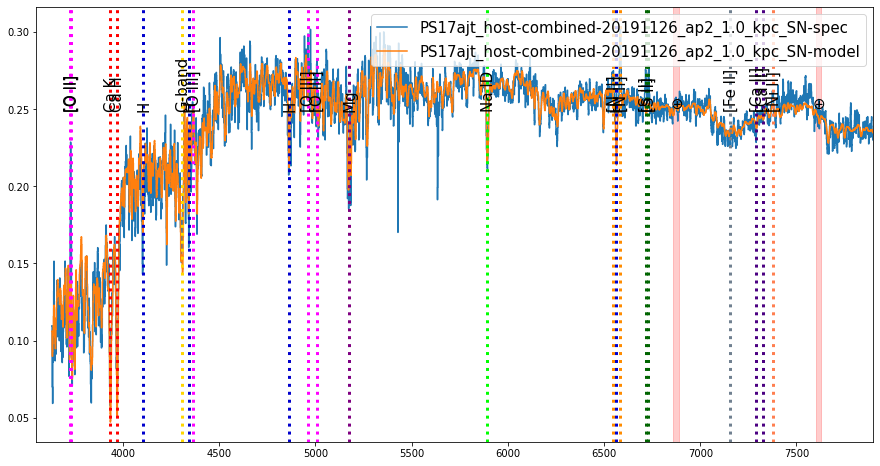

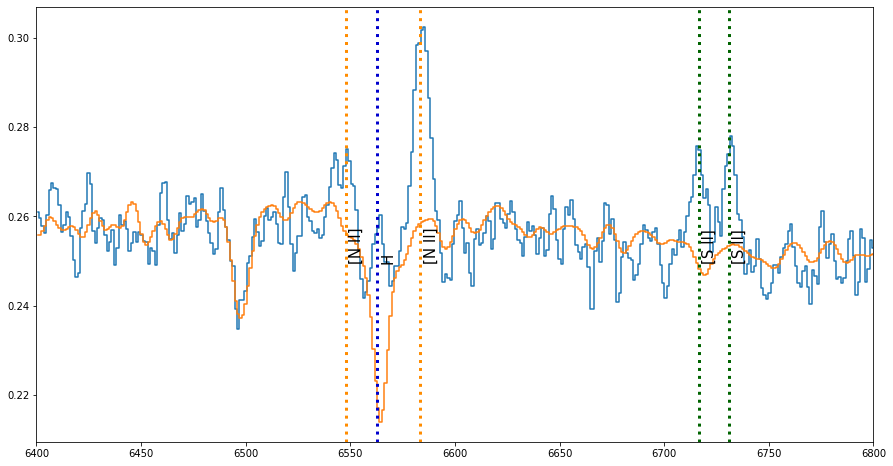

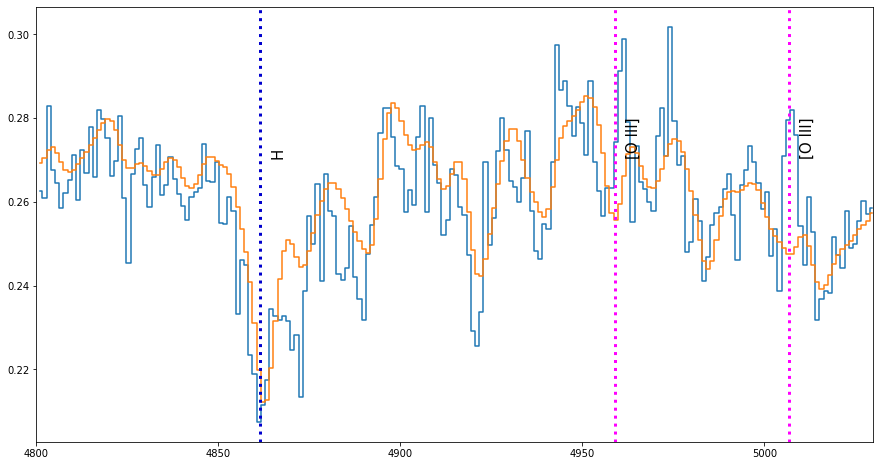

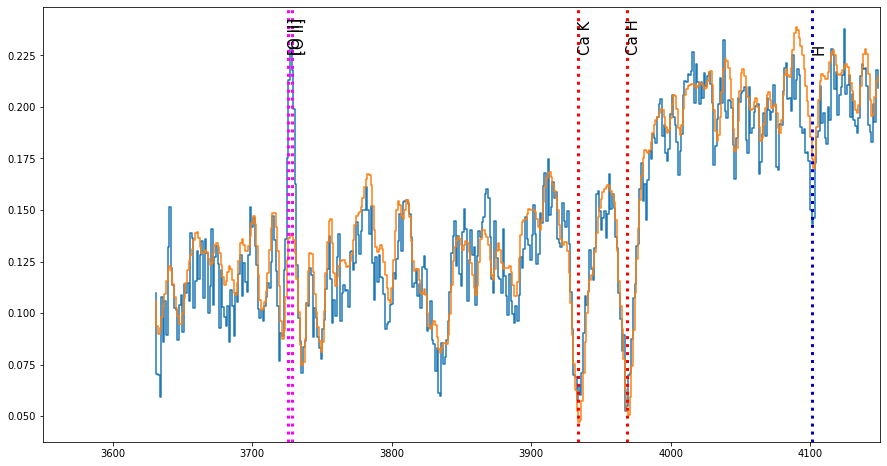

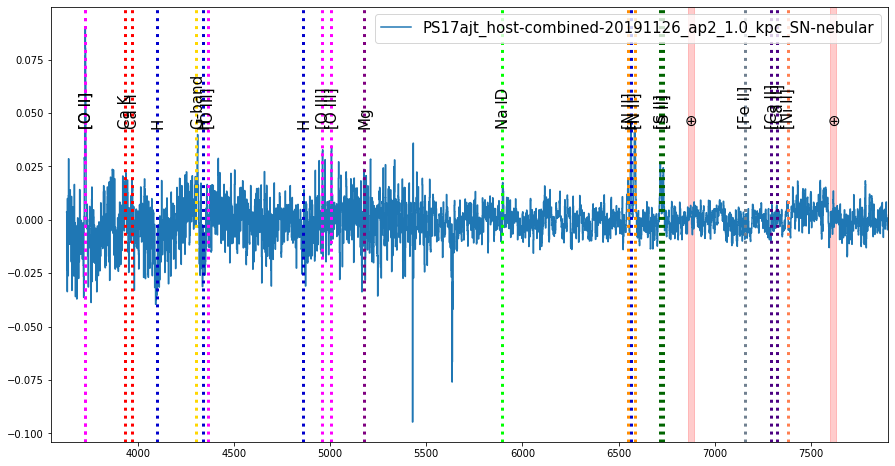

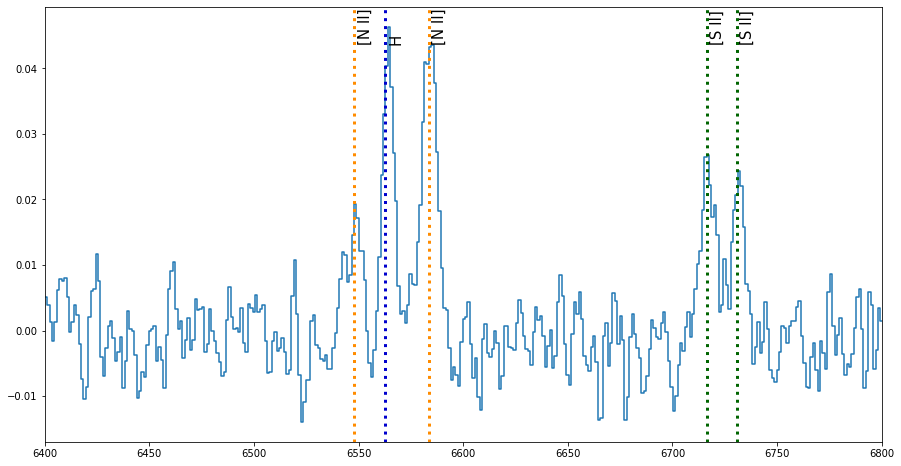

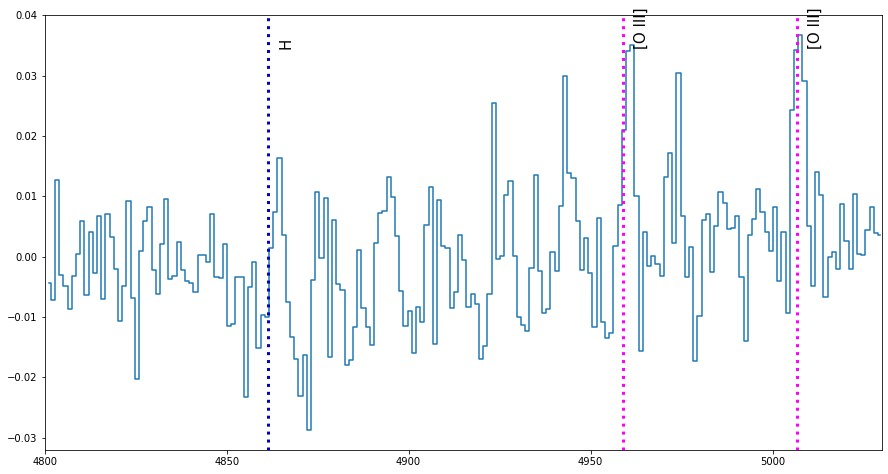

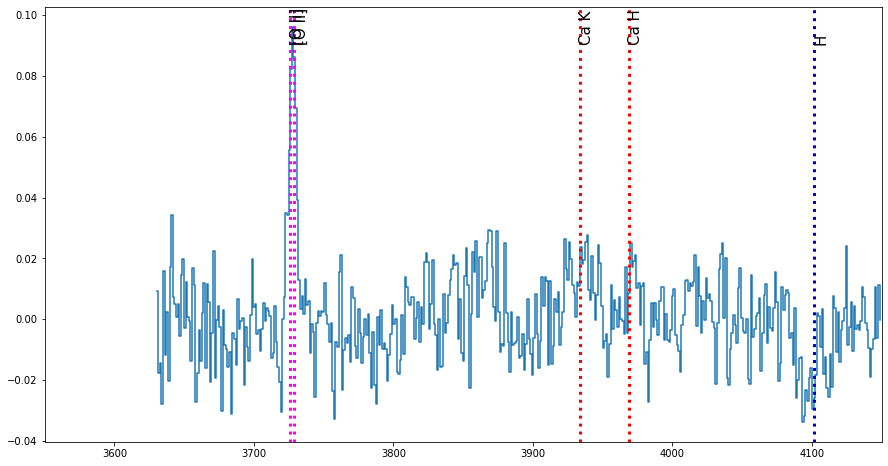

Median continuum:  0.240304067963835
Median residual:  0.0012131112474588202
Residual fraction:  0.5048234338011247 %


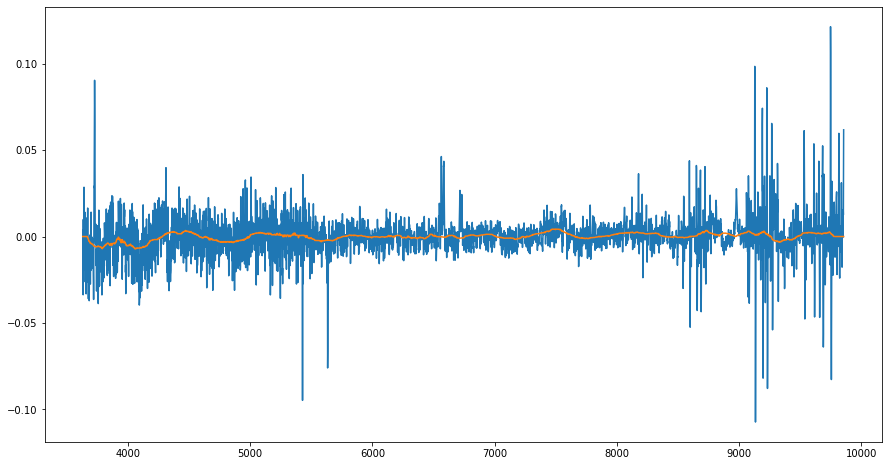

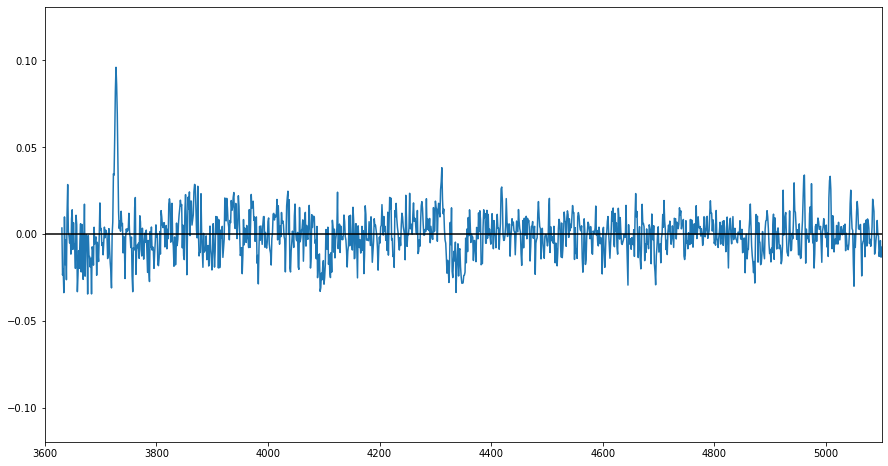

PS17ajt_host-combined-20191126_ap3_1.5_kpc.fits
age: 8.46 Gyr
[Z/H]: -0.29 dex
log M/Msun: 9.9
E(B-V): 0.03 mag


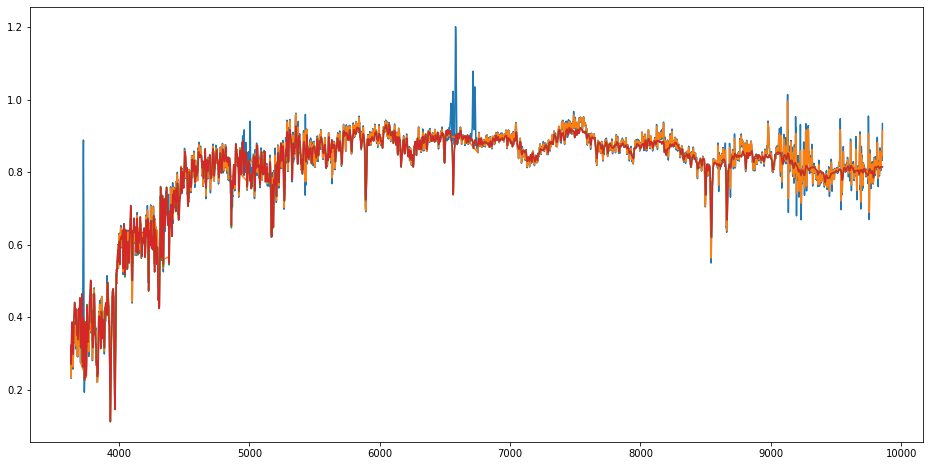

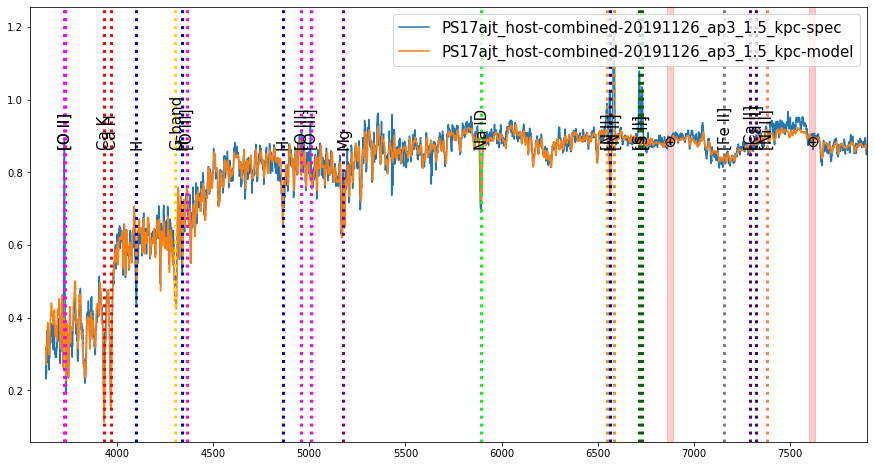

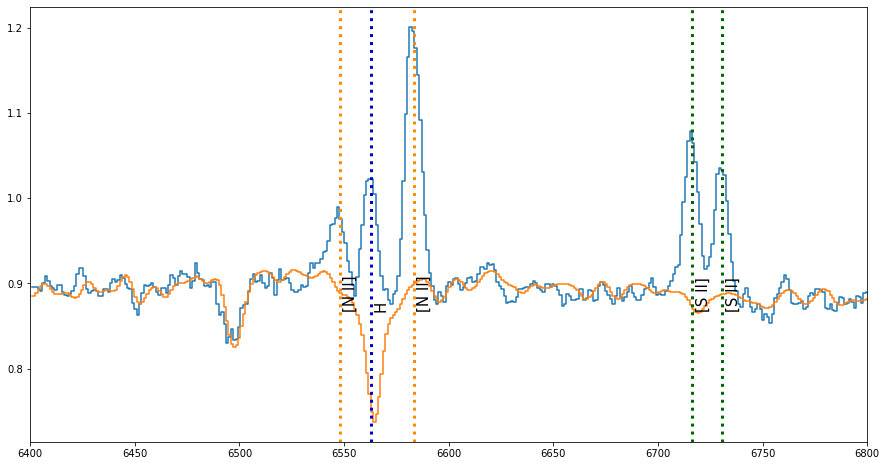

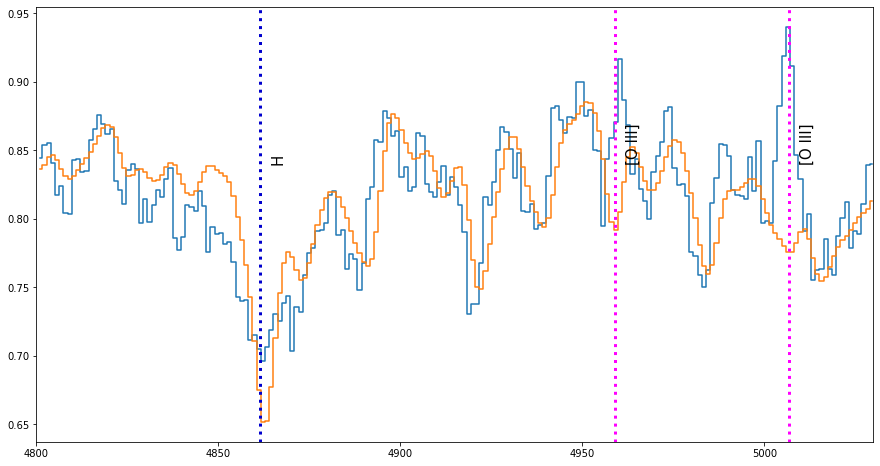

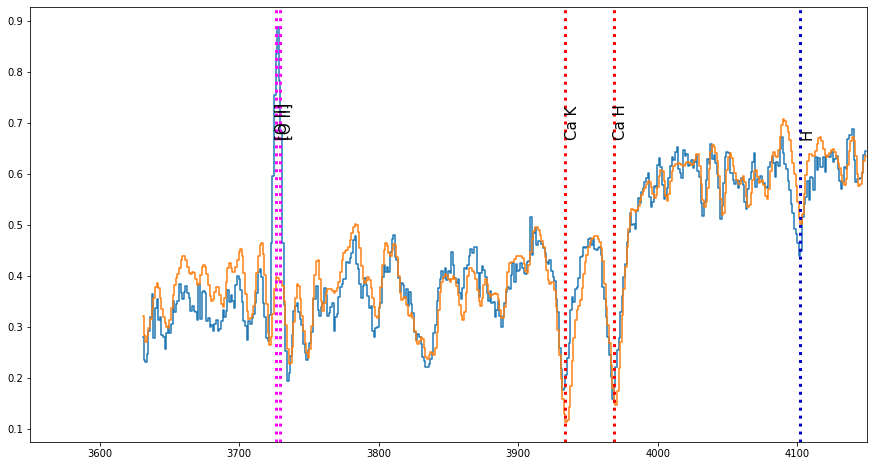

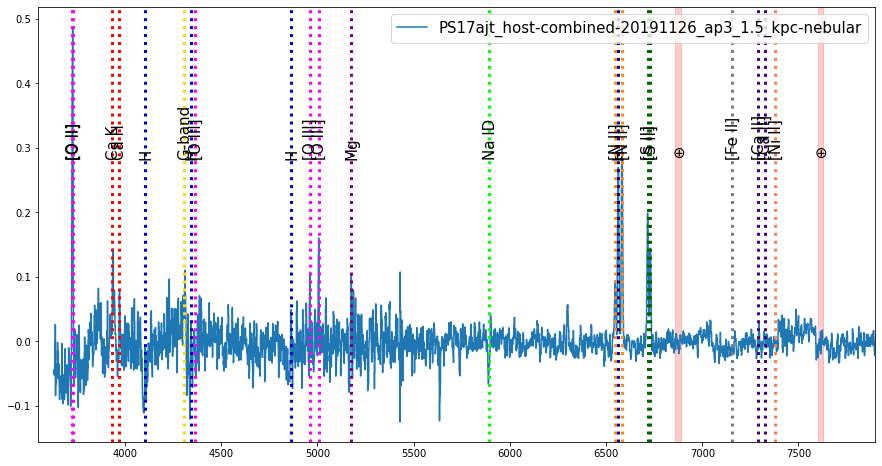

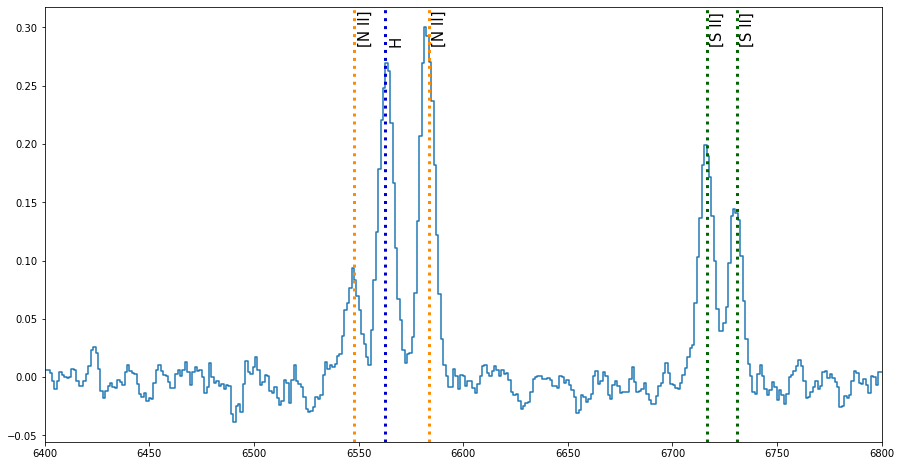

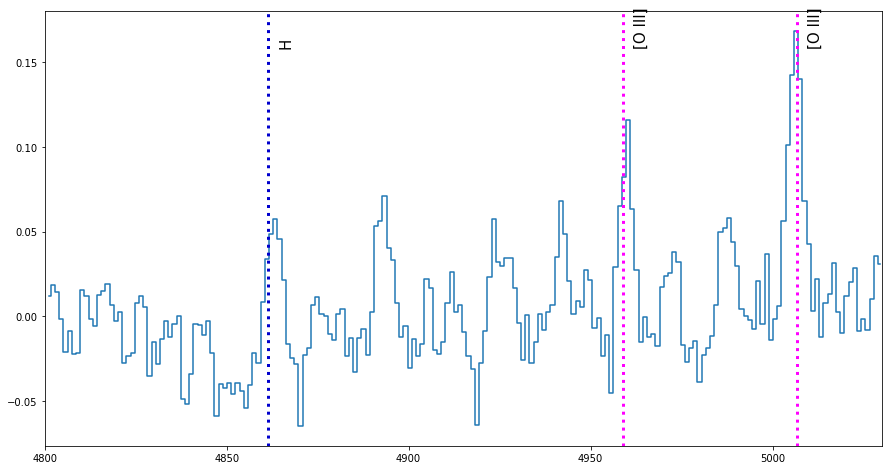

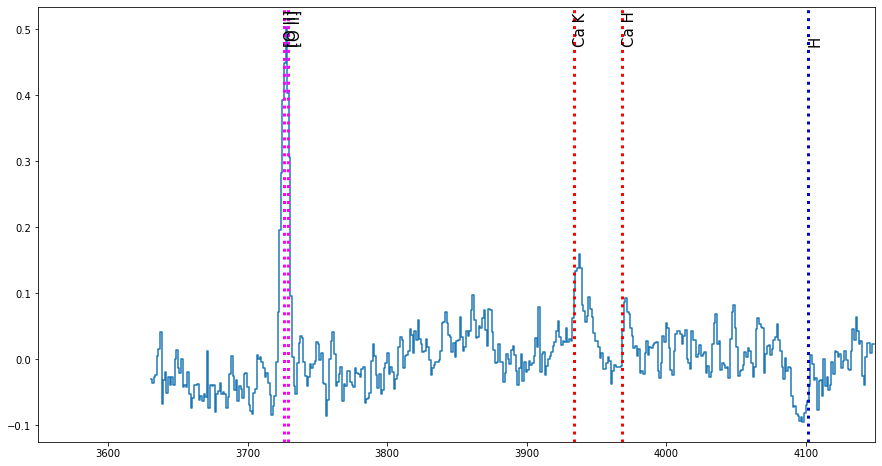

Median continuum:  0.8499482906534972
Median residual:  0.003498722174824276
Residual fraction:  0.41163941539716775 %


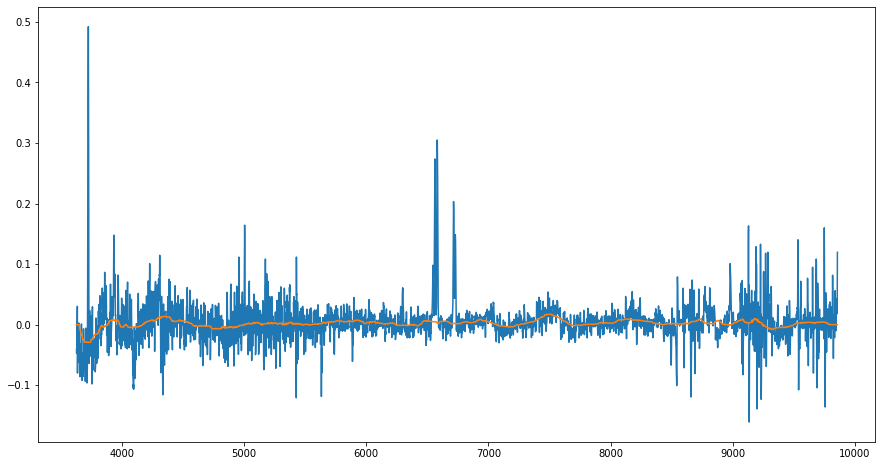

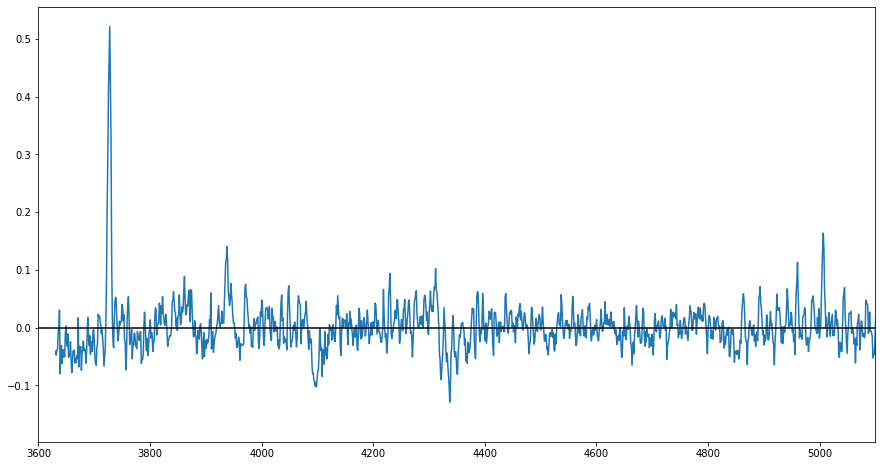

PS17ajt_host-combined-20191126_ap4_1.5_kpc_SN.fits
age: 5.71 Gyr
[Z/H]: -0.53 dex
log M/Msun: 9.39
E(B-V): 0.11 mag


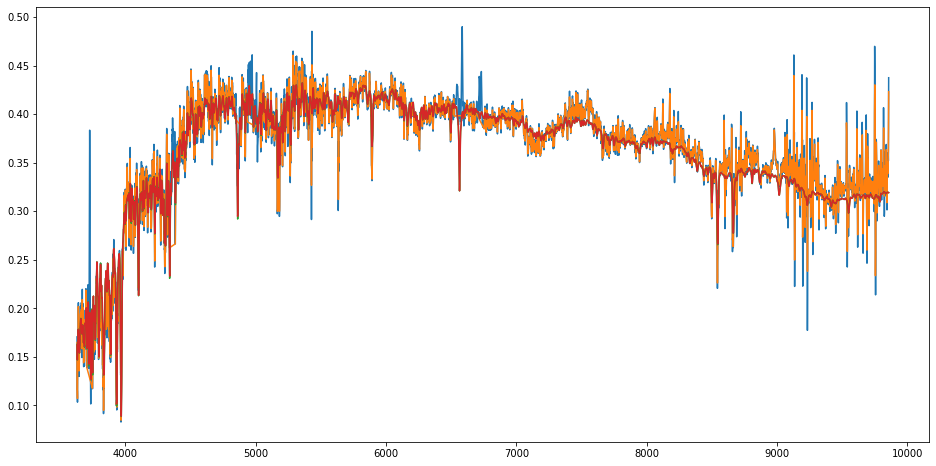

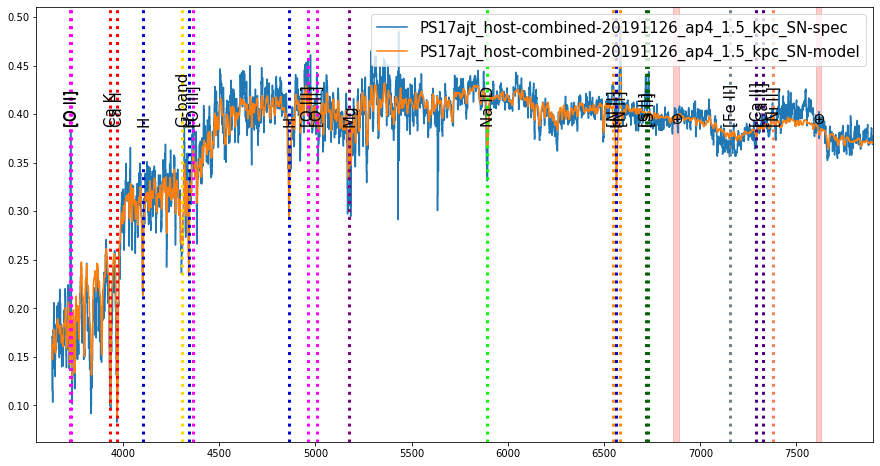

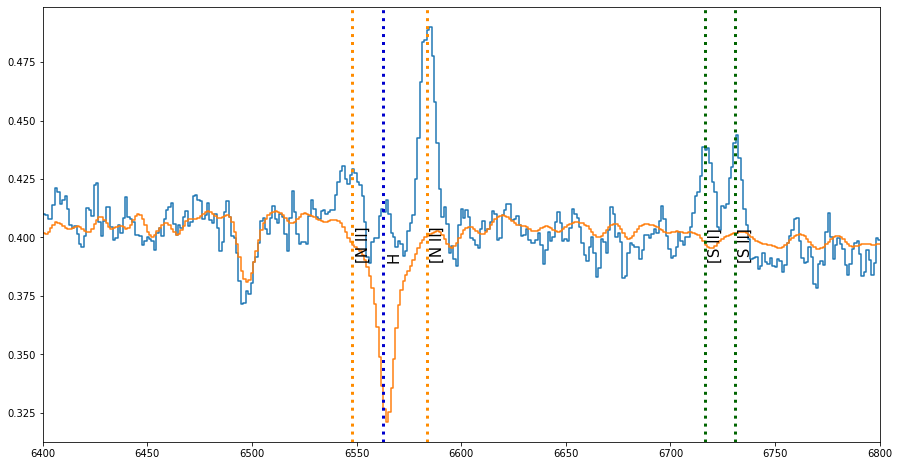

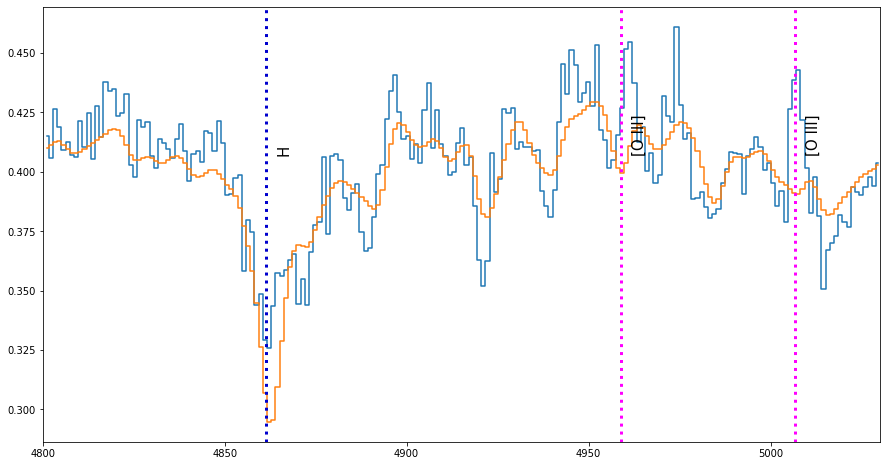

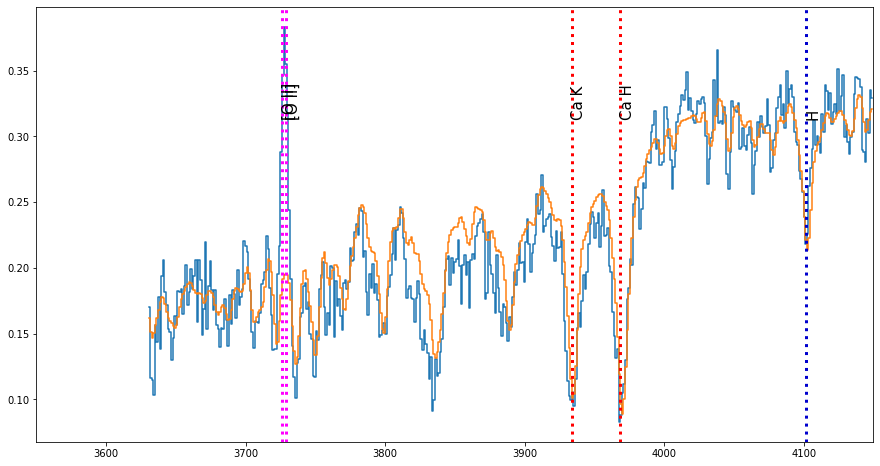

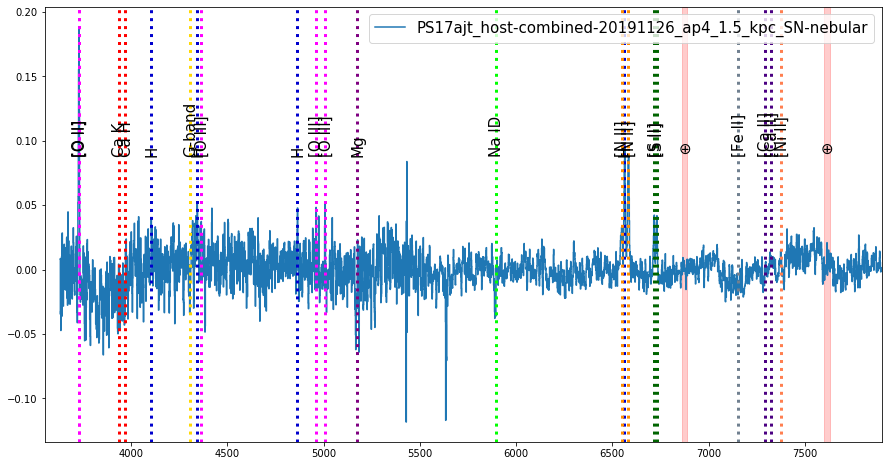

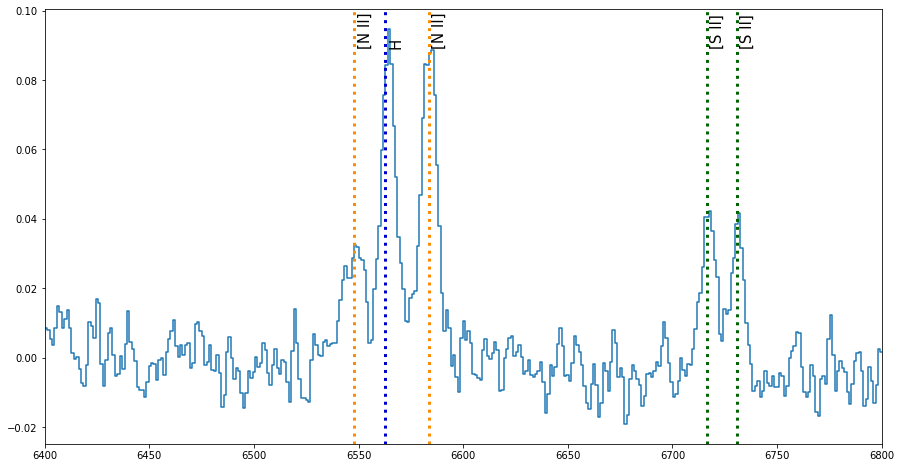

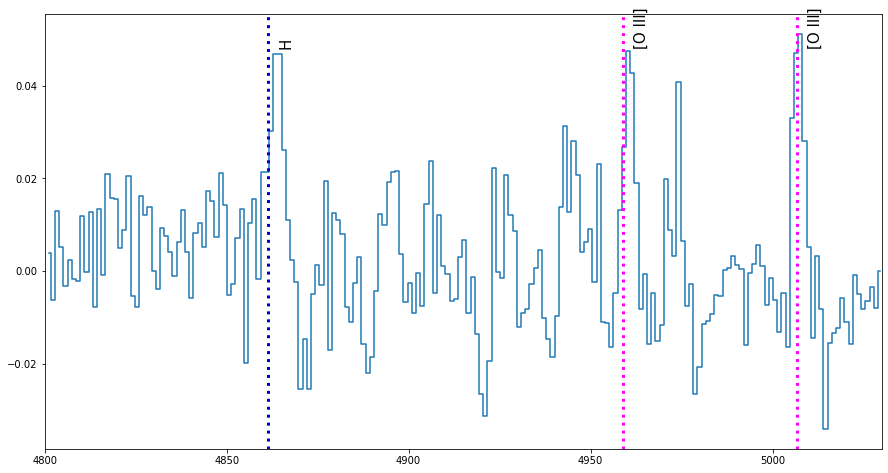

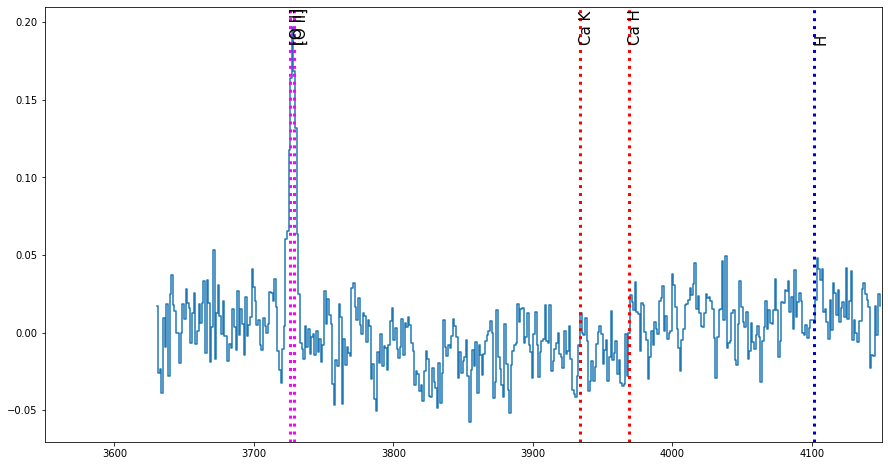

Median continuum:  0.3784511005982796
Median residual:  0.00385752026826619
Residual fraction:  1.019291597294334 %


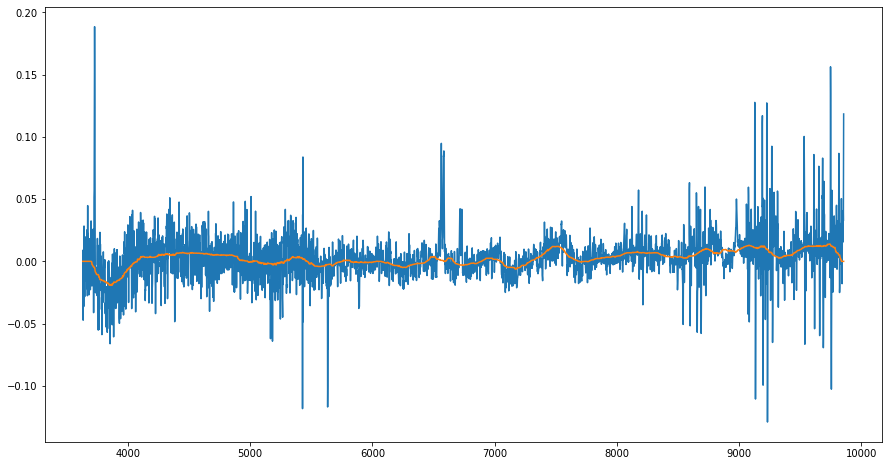

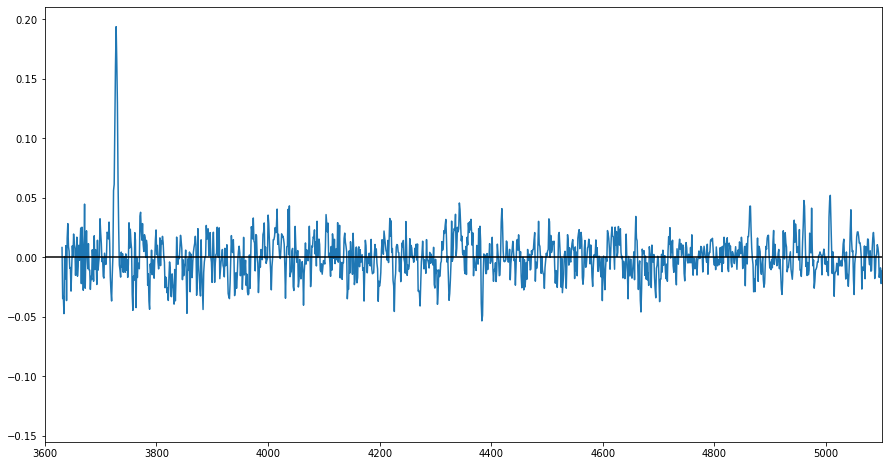

PS17ajt_host-combined-20191126_ap5_2.0_kpc.fits
age: 8.55 Gyr
[Z/H]: -0.25 dex
log M/Msun: 10.01
E(B-V): 0.1 mag


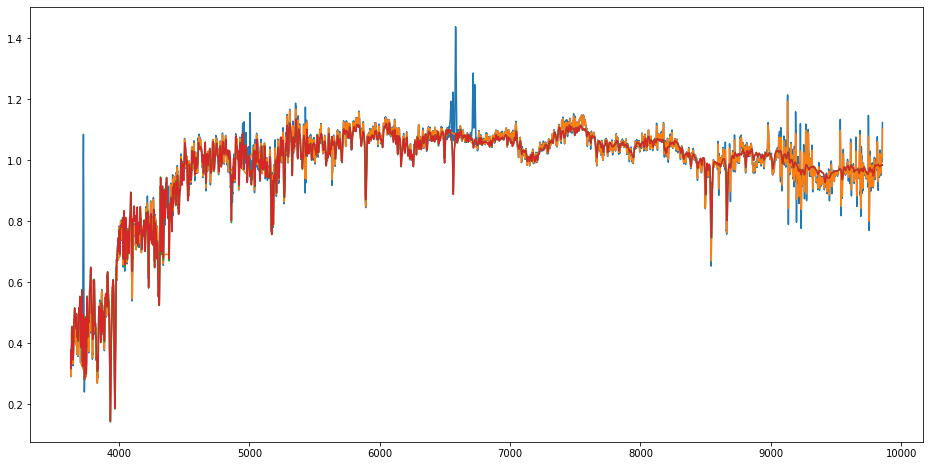

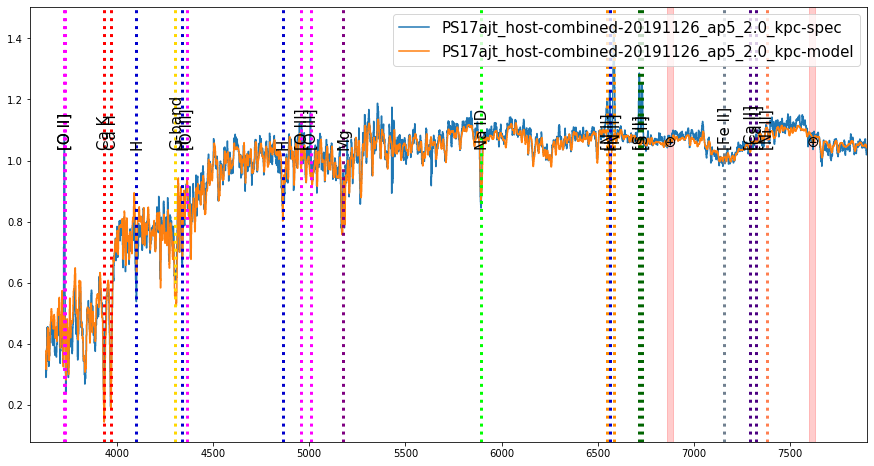

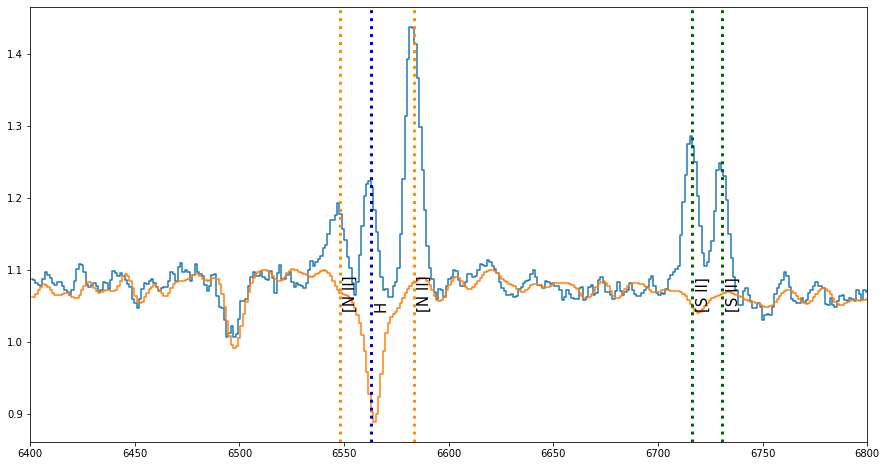

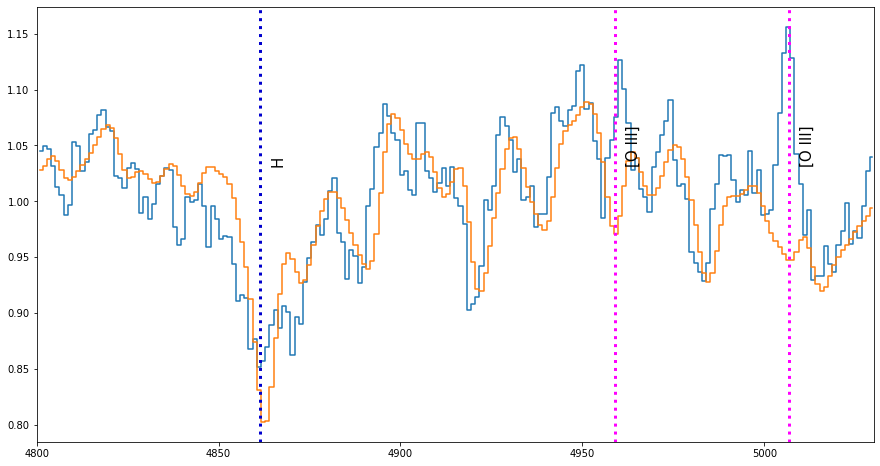

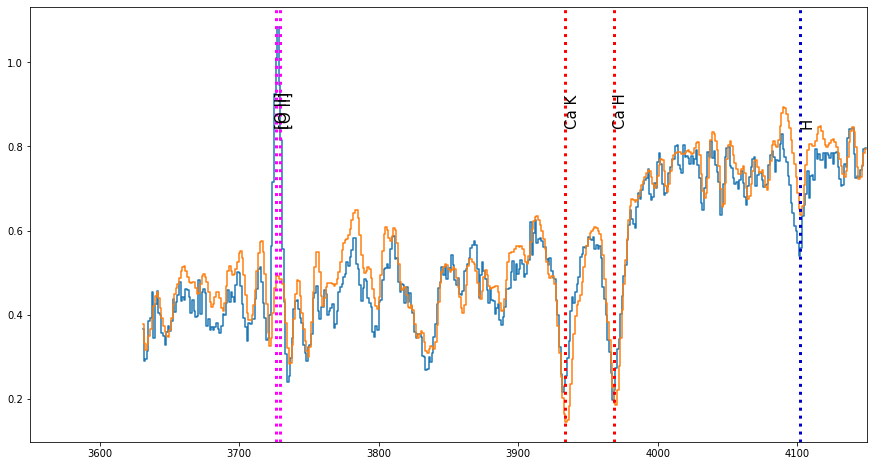

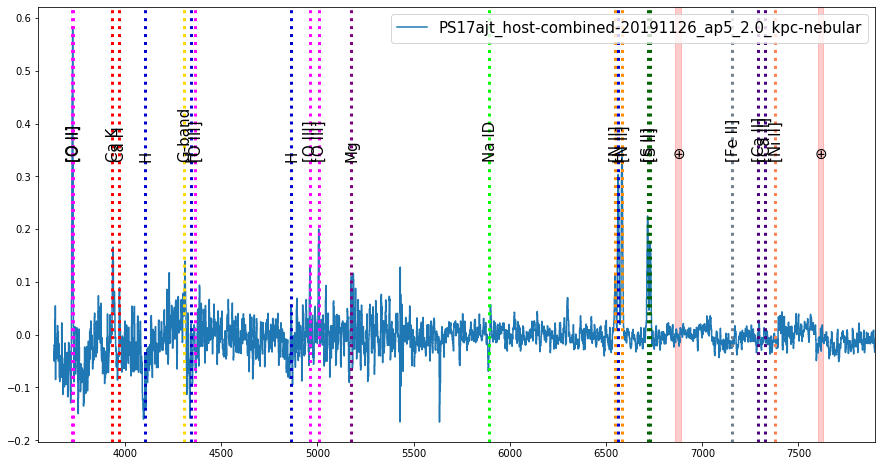

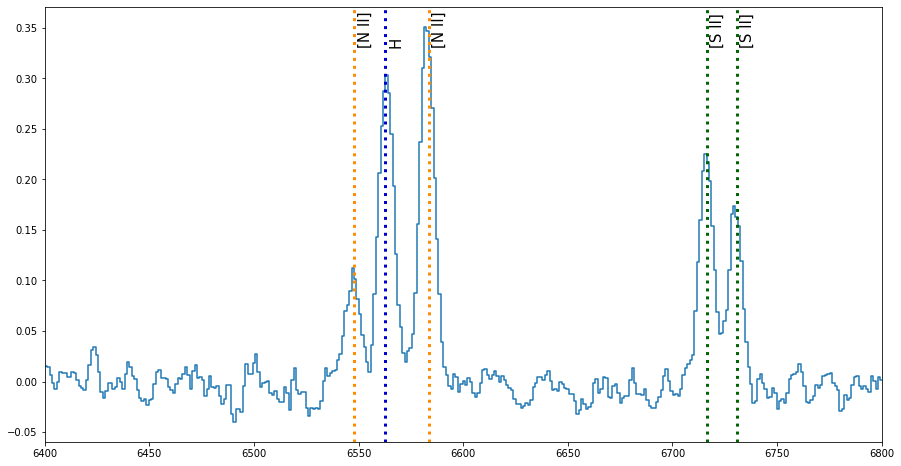

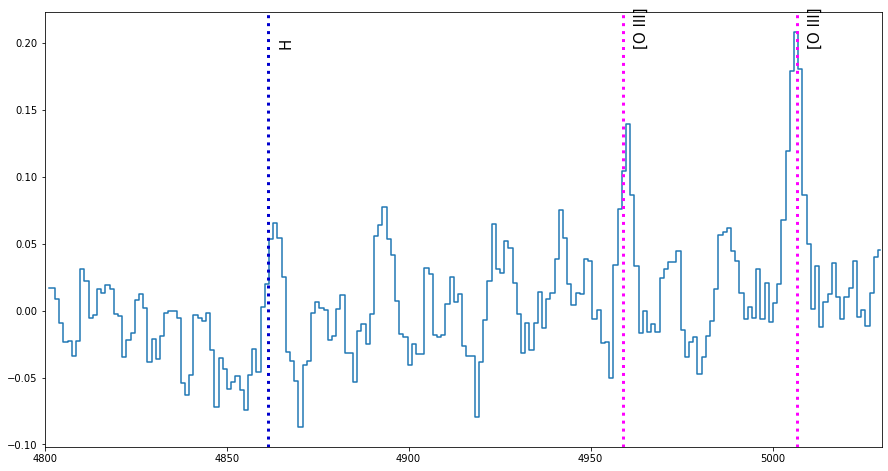

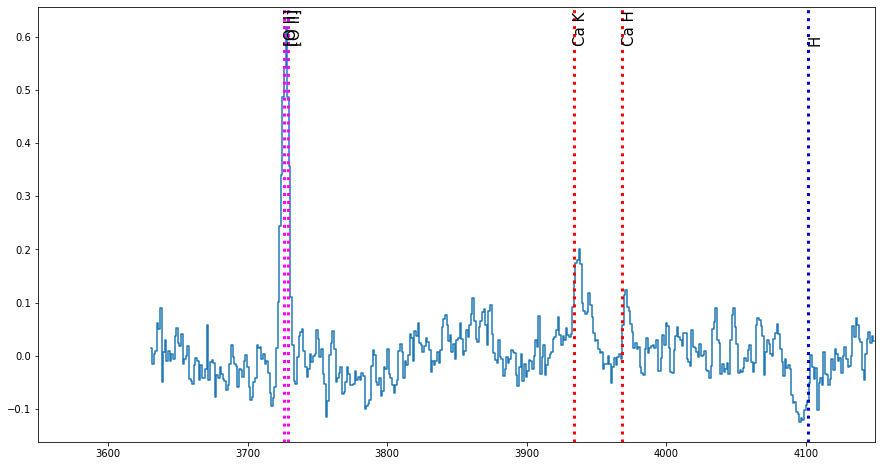

Median continuum:  1.026787312366112
Median residual:  0.0072127300477786704
Residual fraction:  0.7024560939653386 %


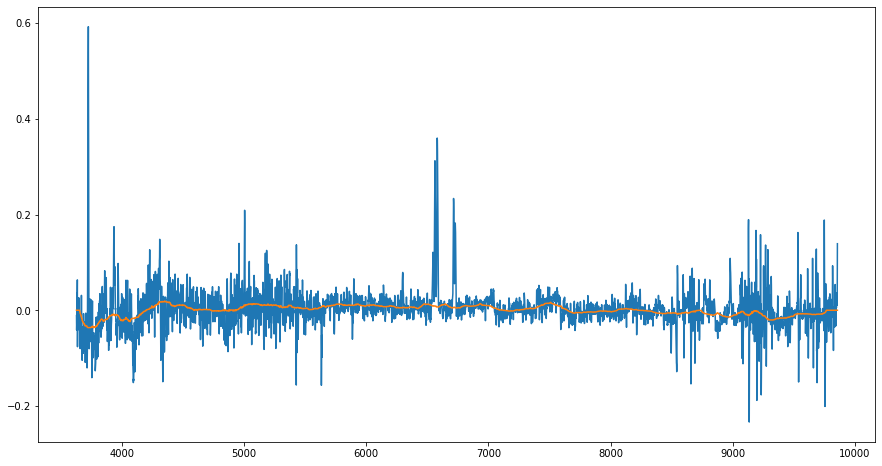

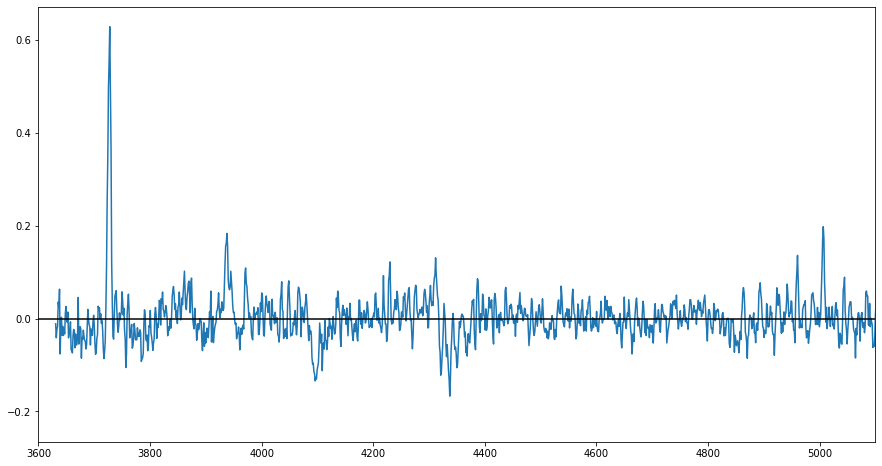

PS17ajt_host-combined-20191126_ap6_2.0_kpc_SN.fits
age: 12.89 Gyr
[Z/H]: -0.33 dex
log M/Msun: 9.88
E(B-V): 0.0 mag


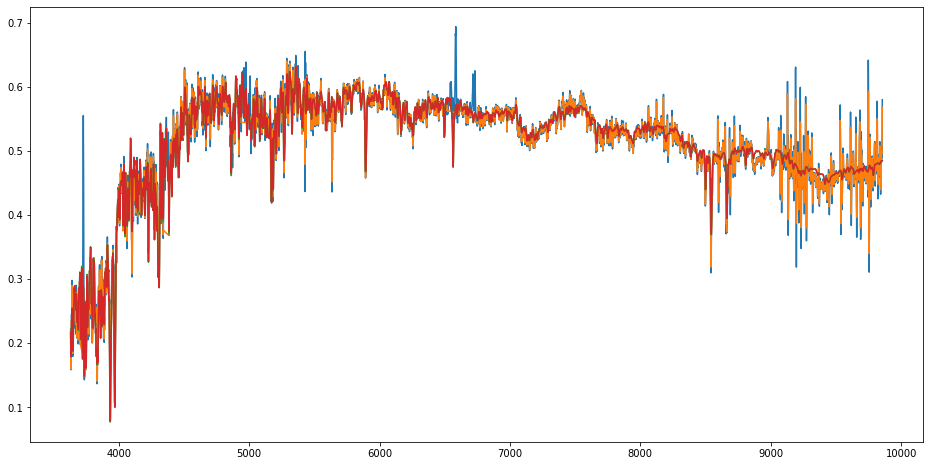

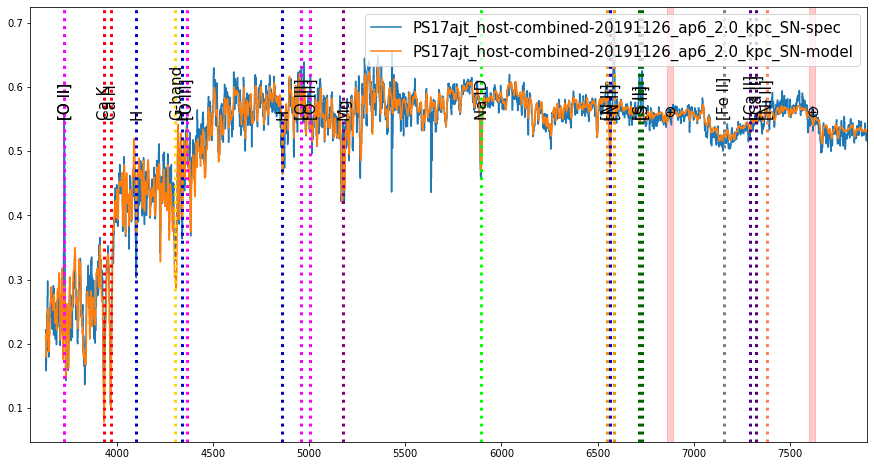

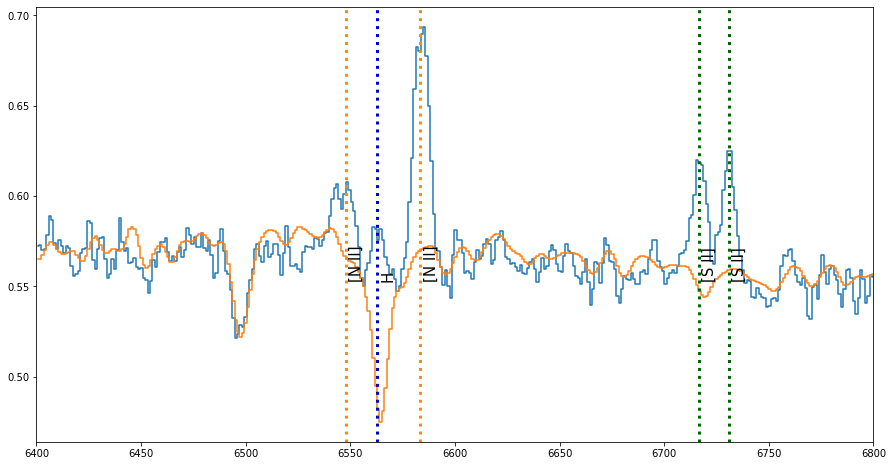

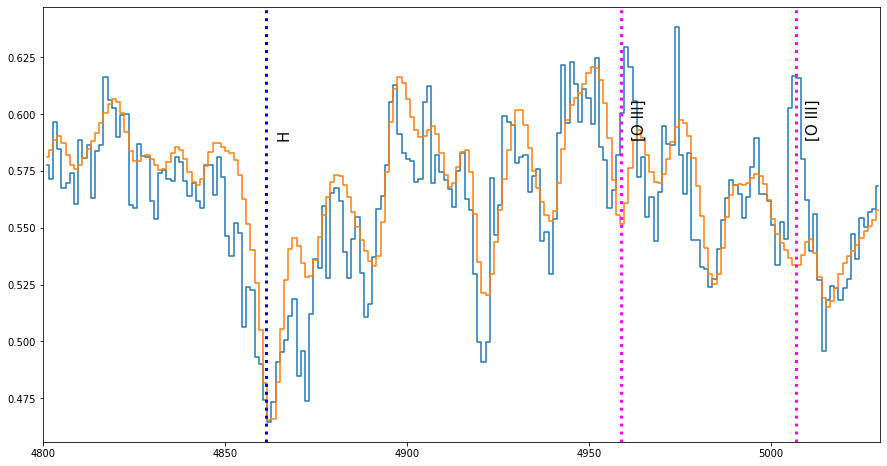

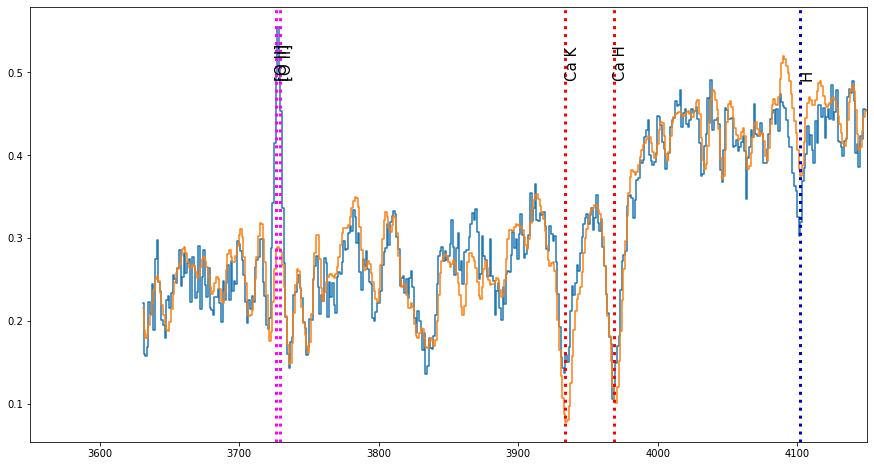

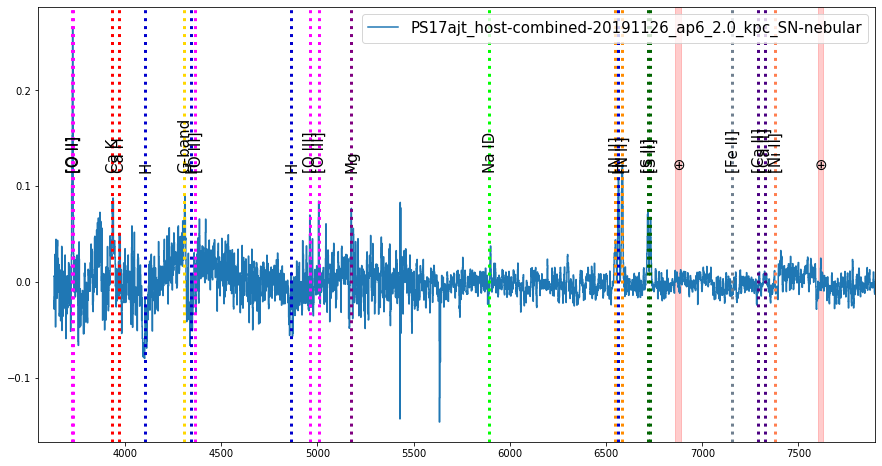

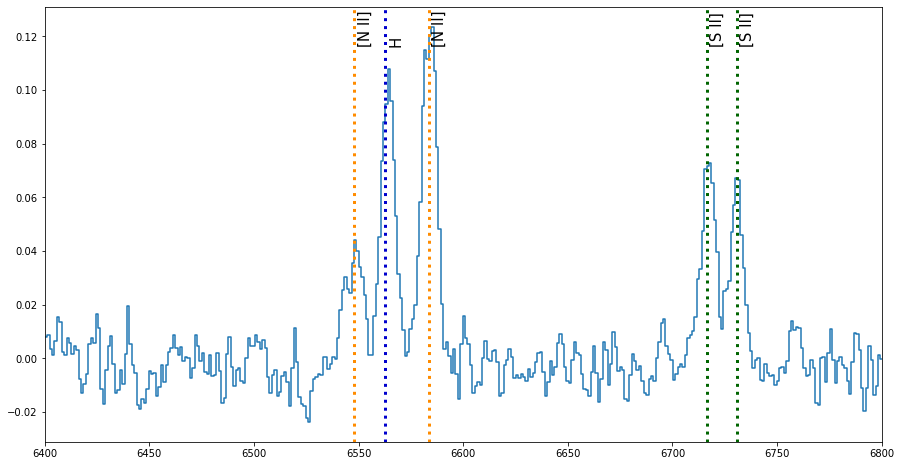

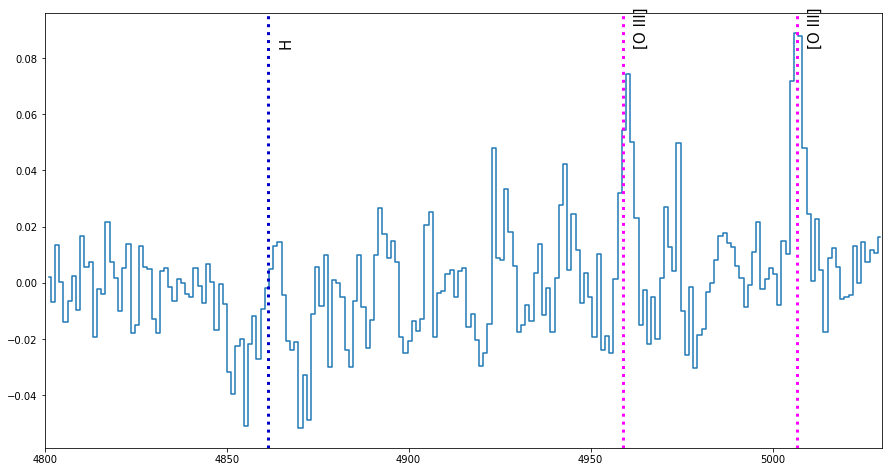

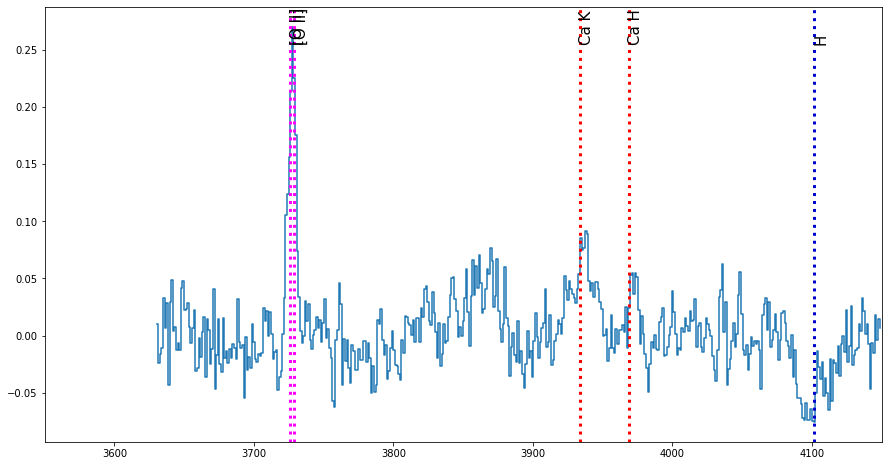

Median continuum:  0.5321718399354308
Median residual:  0.0036501805448500013
Residual fraction:  0.6859026109485393 %


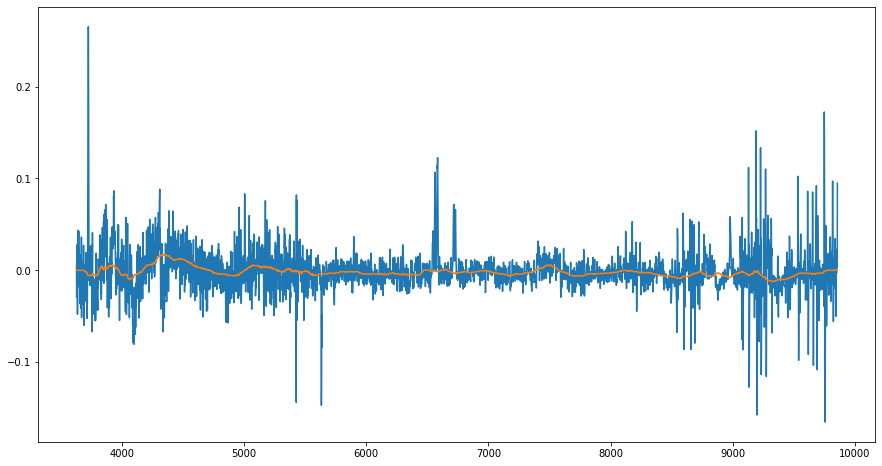

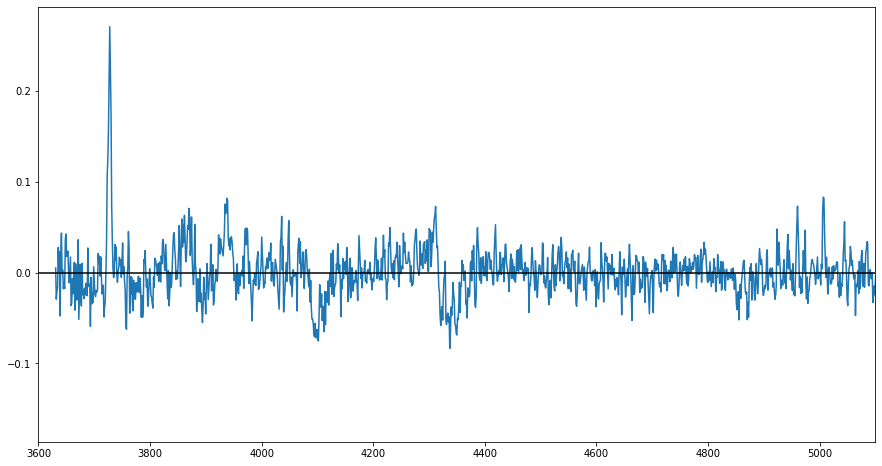

PS17ajt_host-combined-20191126_ap7_3.0_kpc.fits
age: 2.79 Gyr
[Z/H]: -0.25 dex
log M/Msun: 10.05
E(B-V): 0.12 mag


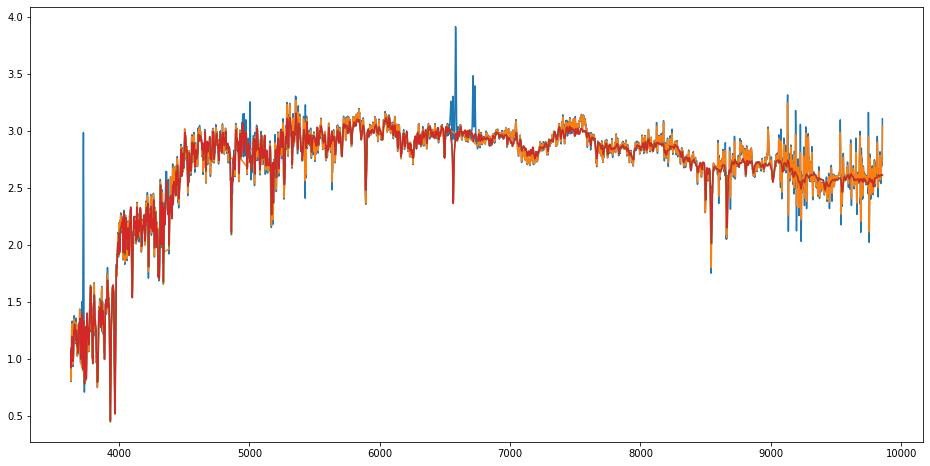

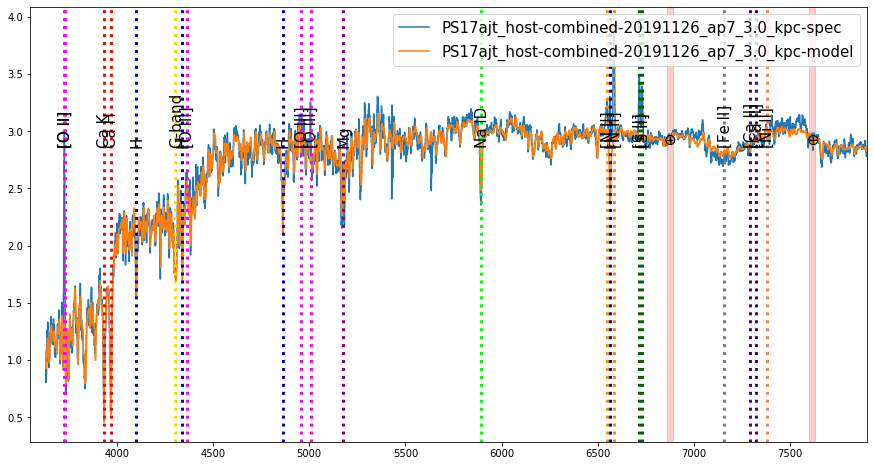

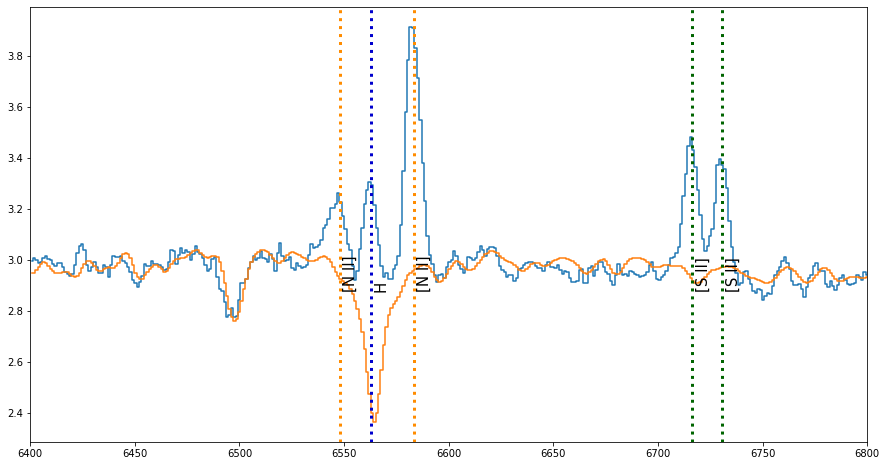

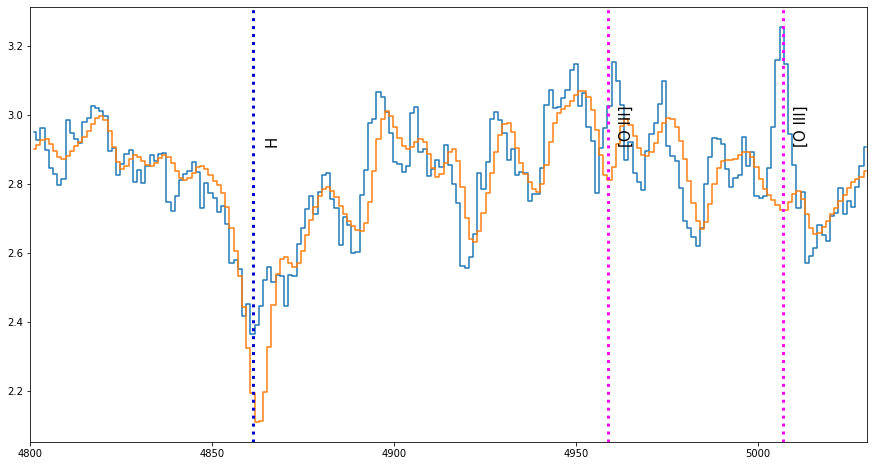

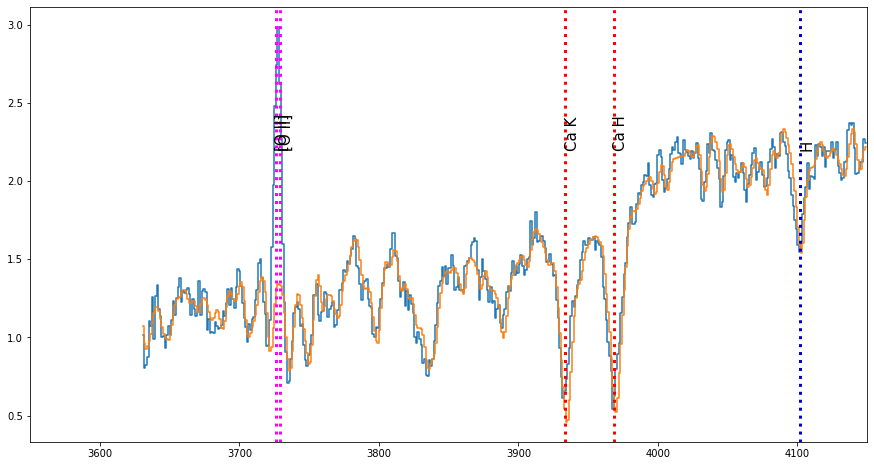

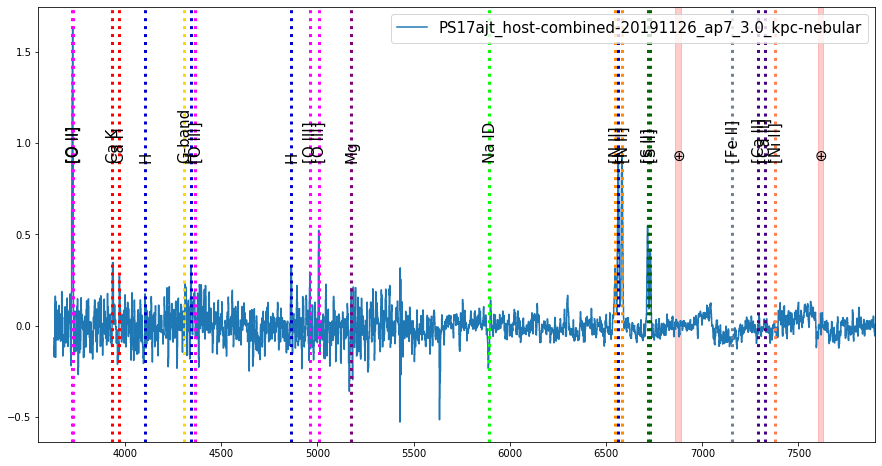

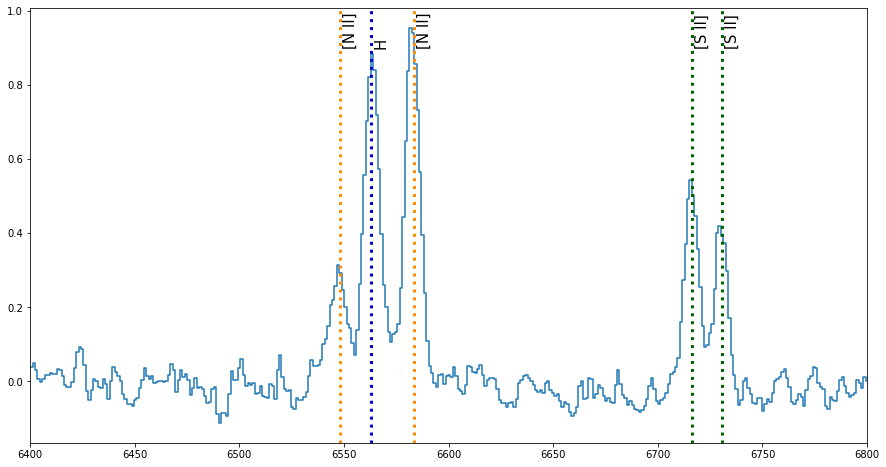

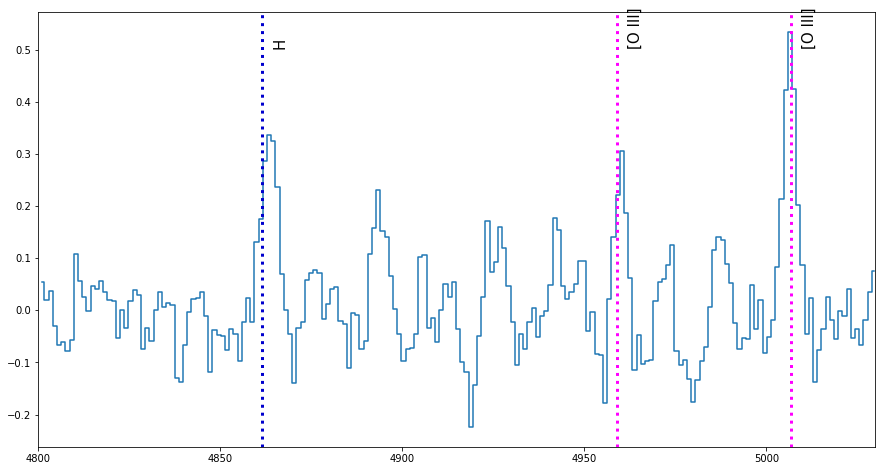

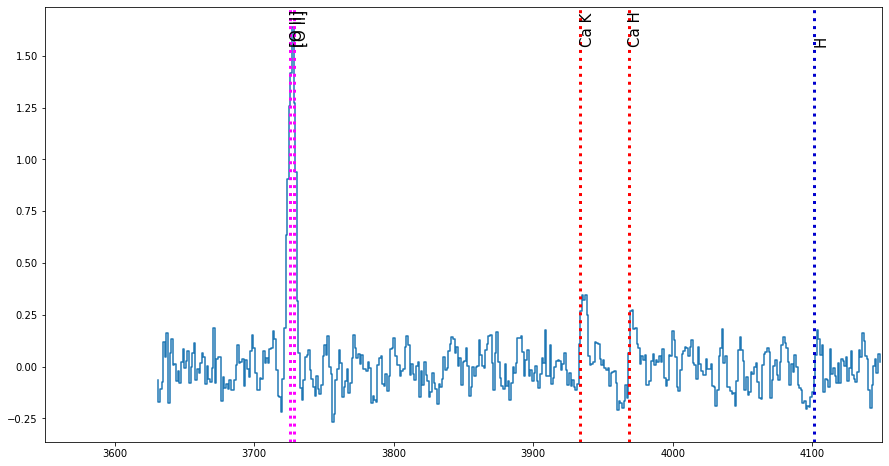

Median continuum:  2.8240080548023703
Median residual:  0.011662855602103006
Residual fraction:  0.4129894595119771 %


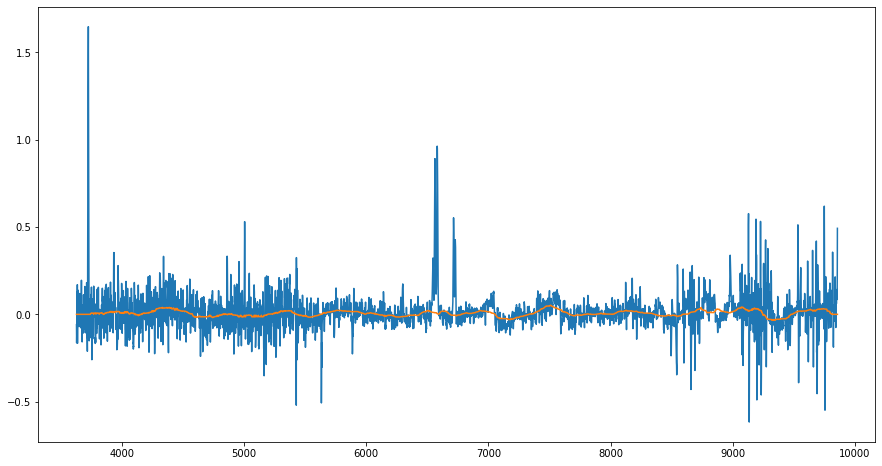

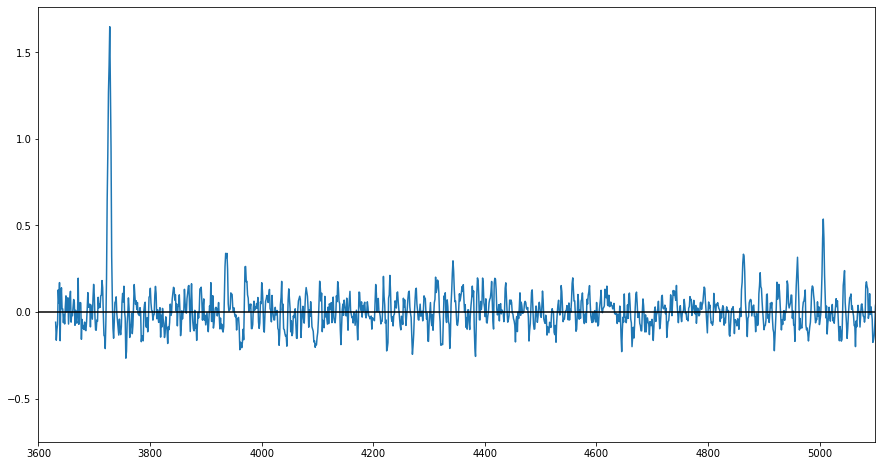

PS17ajt_host-combined-20191126_ap8_3.0_kpc_SN.fits
age: 4.98 Gyr
[Z/H]: -0.47 dex
log M/Msun: 9.71
E(B-V): 0.1 mag


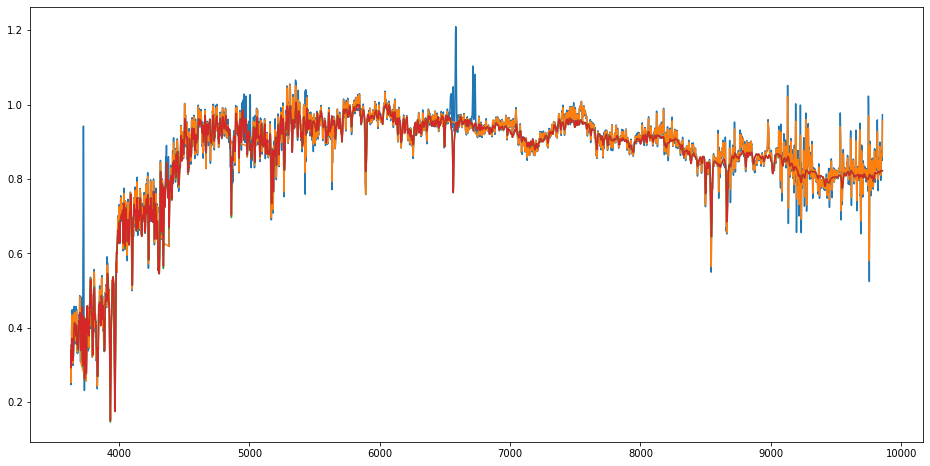

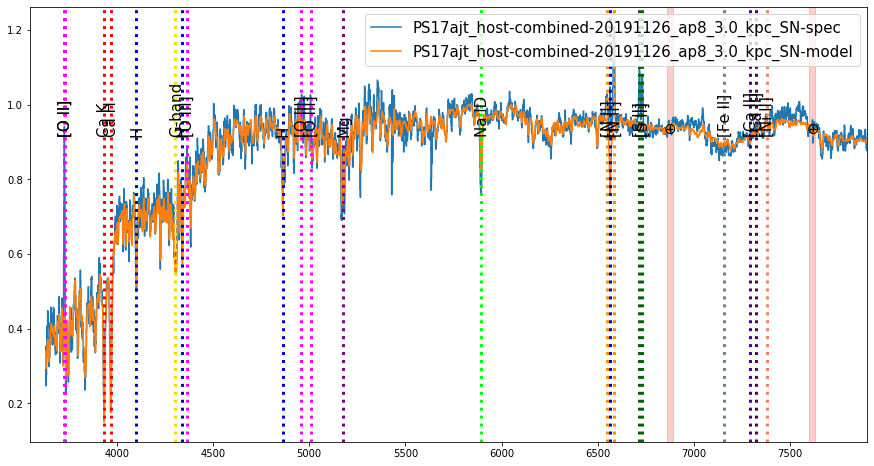

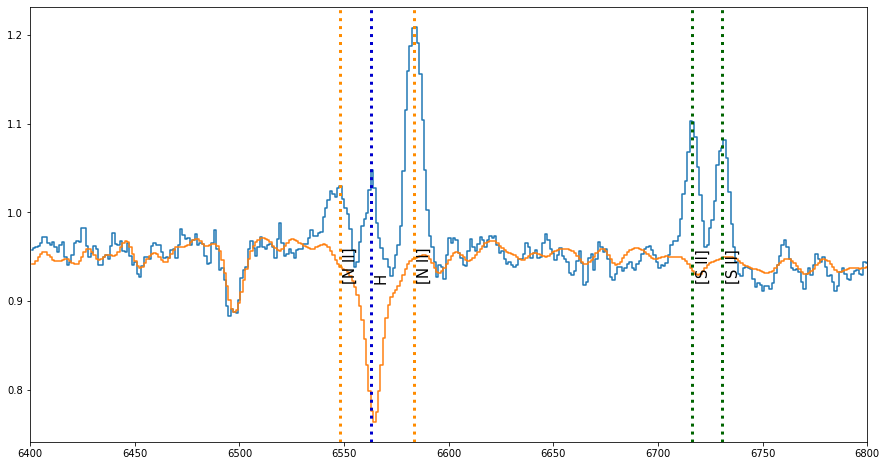

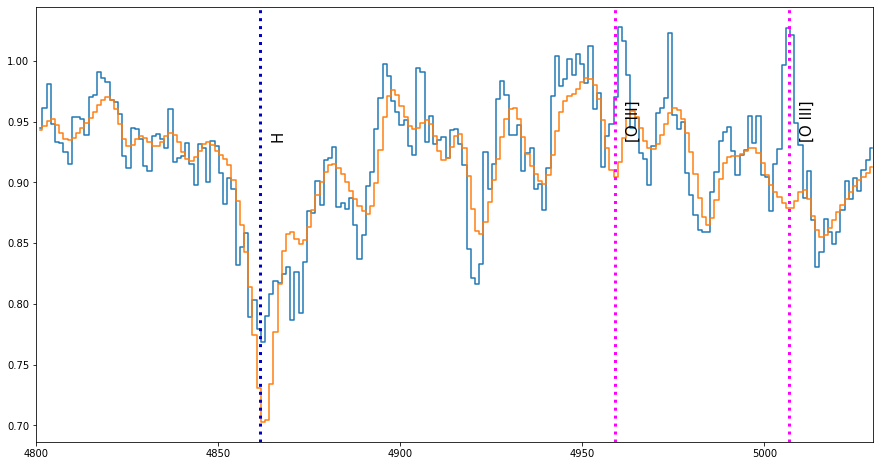

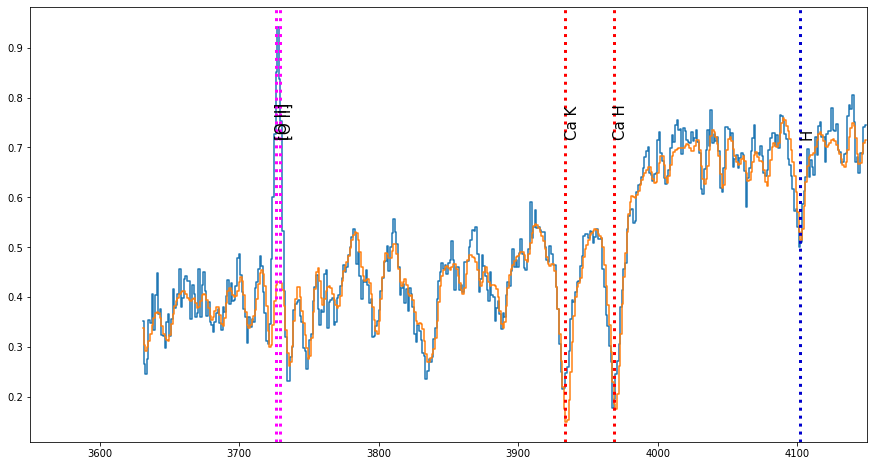

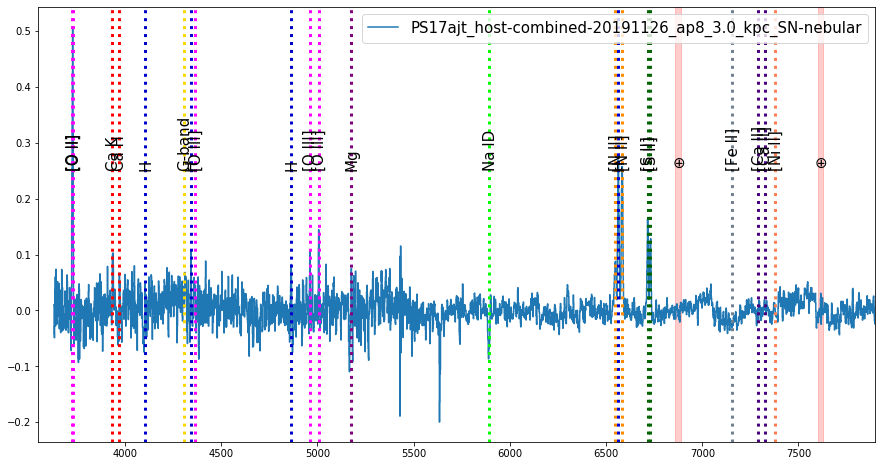

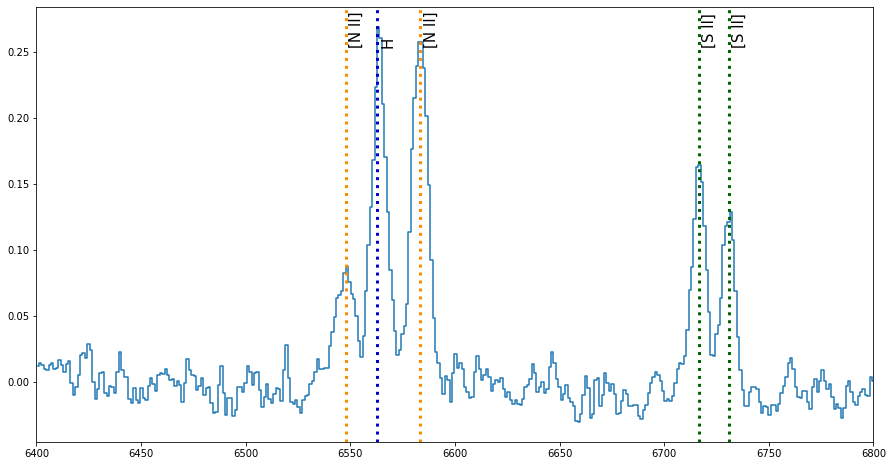

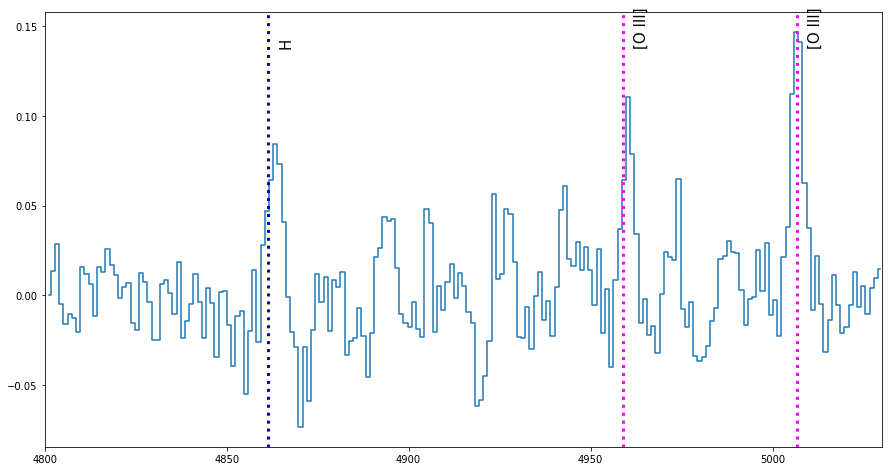

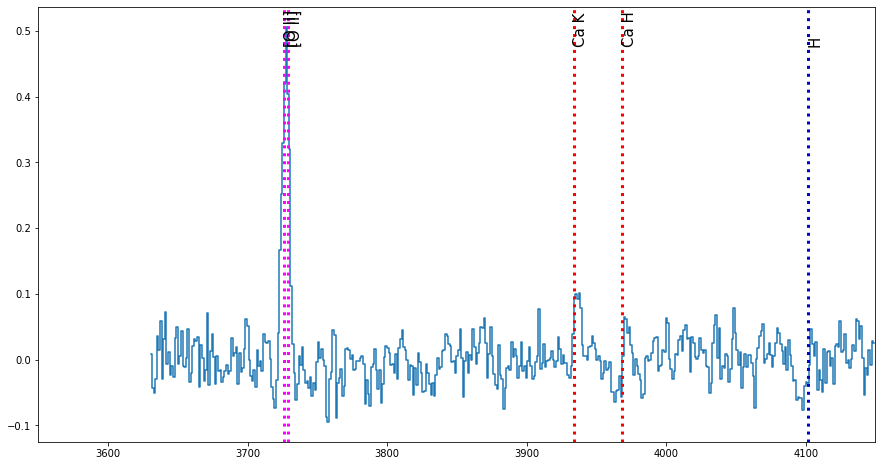

Median continuum:  0.9041688342468825
Median residual:  0.004668141107847967
Residual fraction:  0.5162908663774332 %


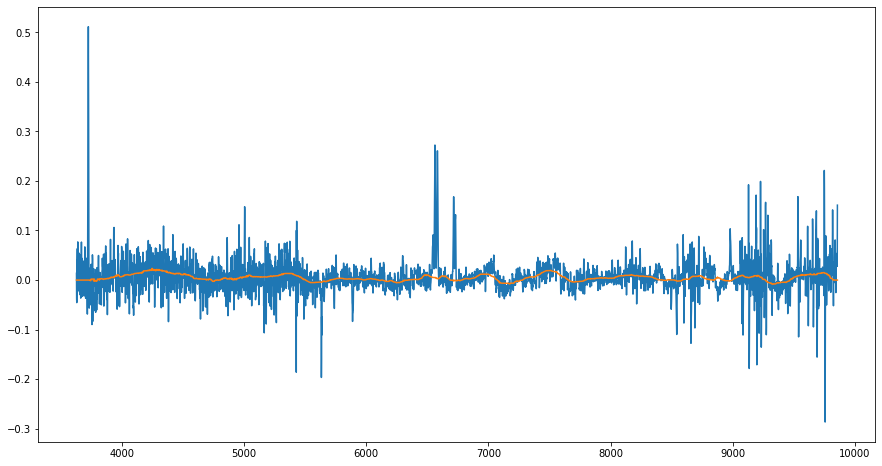

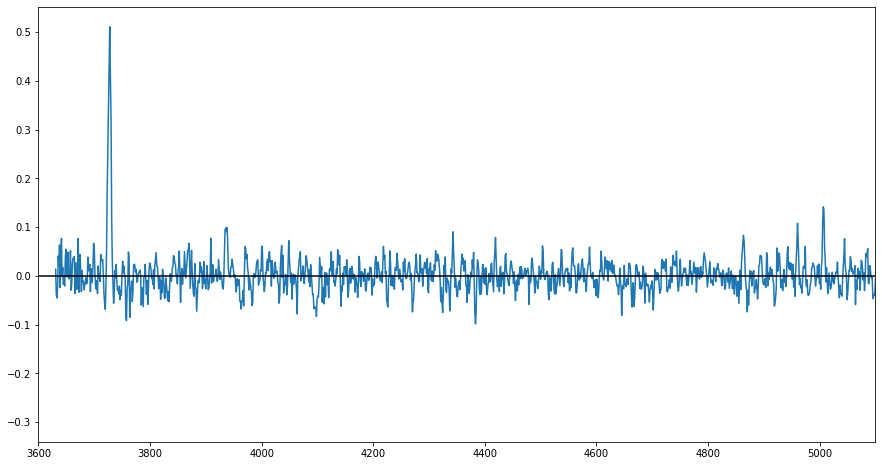

PS17ajt_host-combined-20191126_ap9_13.22_rkron.fits
age: 6.53 Gyr
[Z/H]: -0.42 dex
log M/Msun: 10.1
E(B-V): 0.07 mag


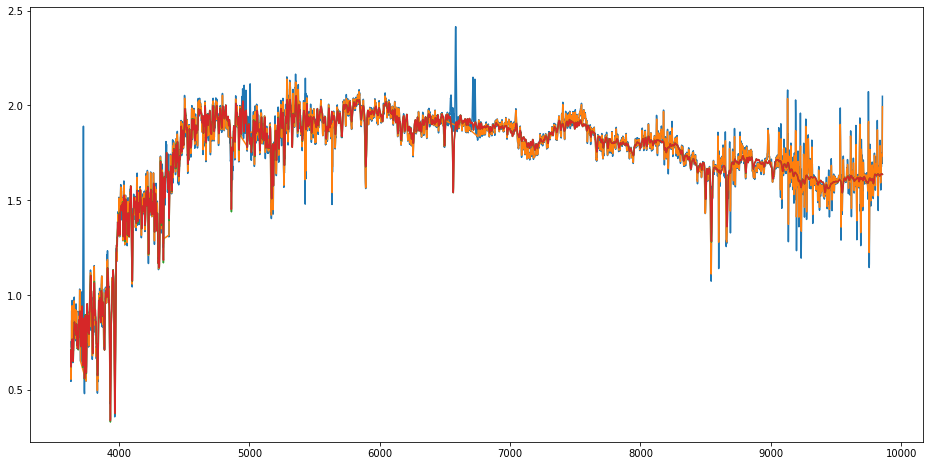

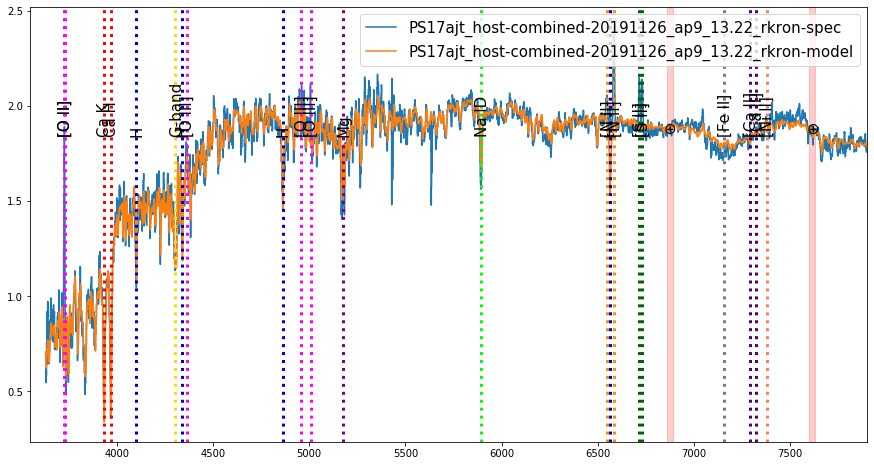

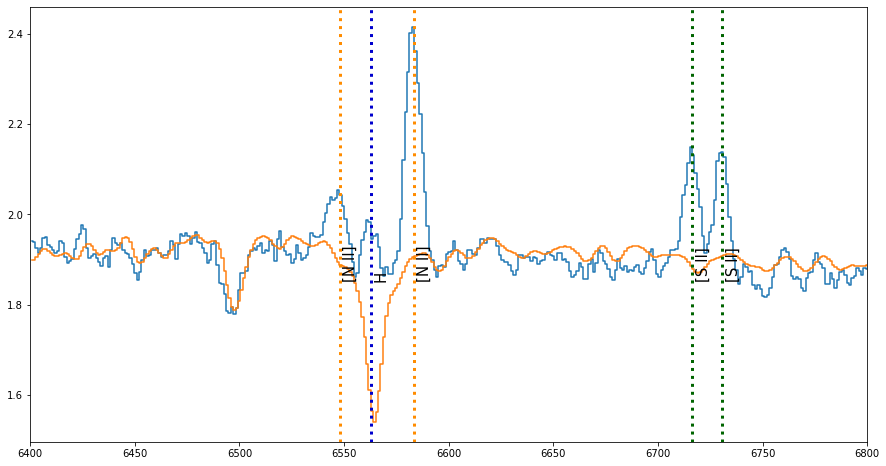

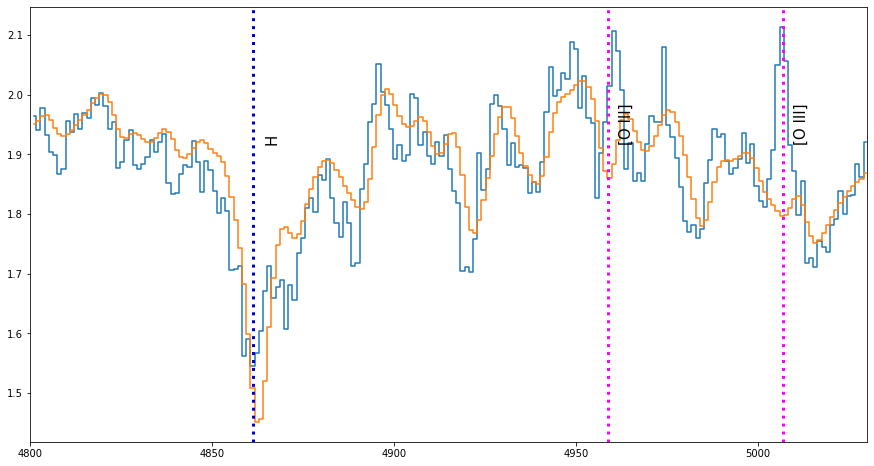

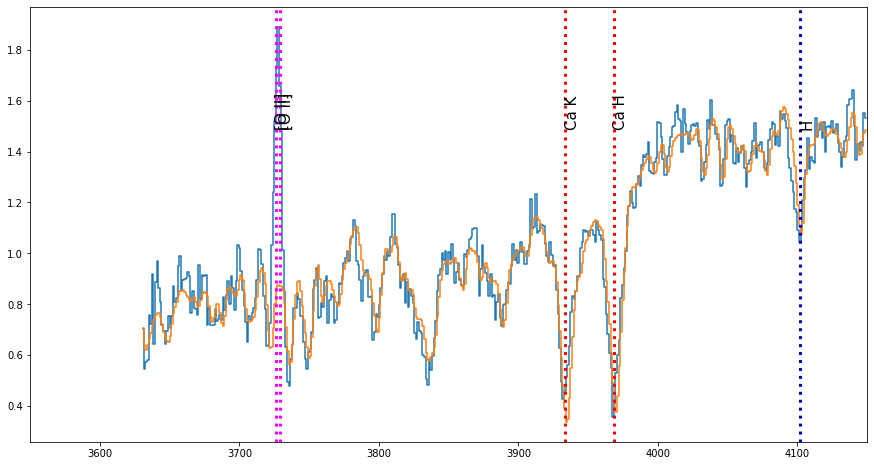

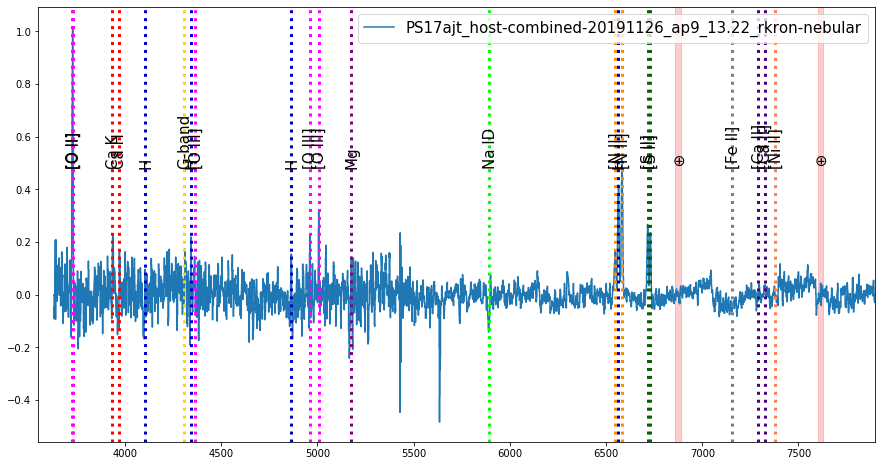

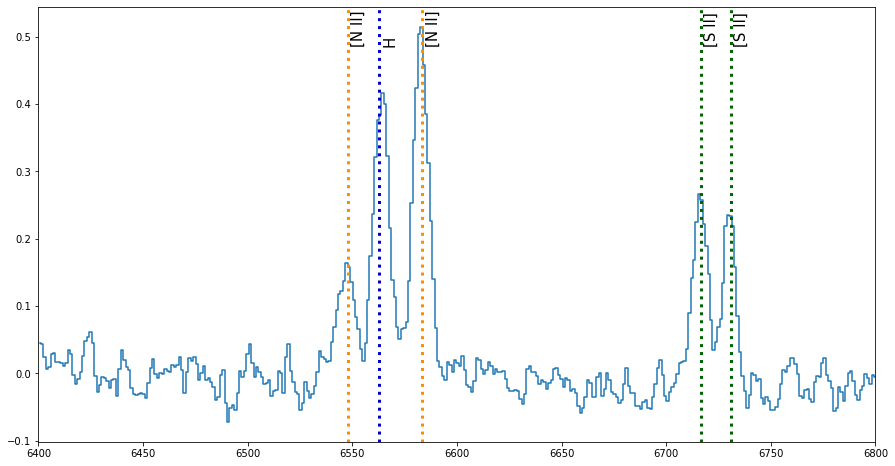

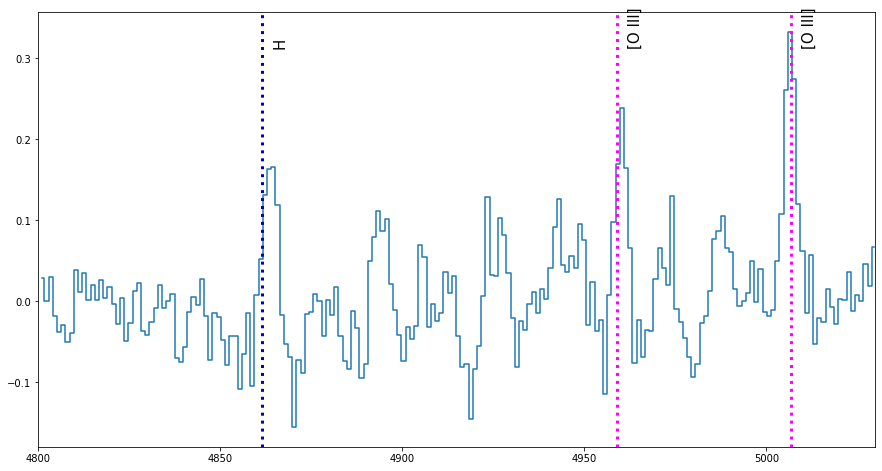

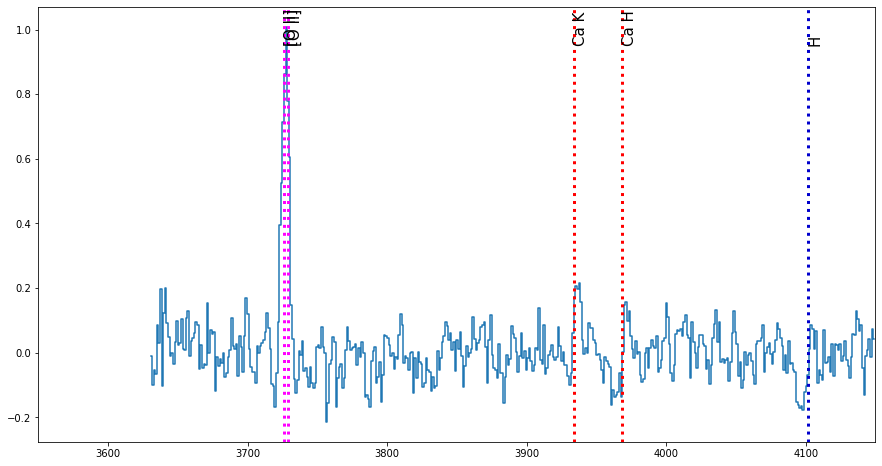

Median continuum:  1.8054288049263538
Median residual:  0.007589881270039012
Residual fraction:  0.4203921666326031 %


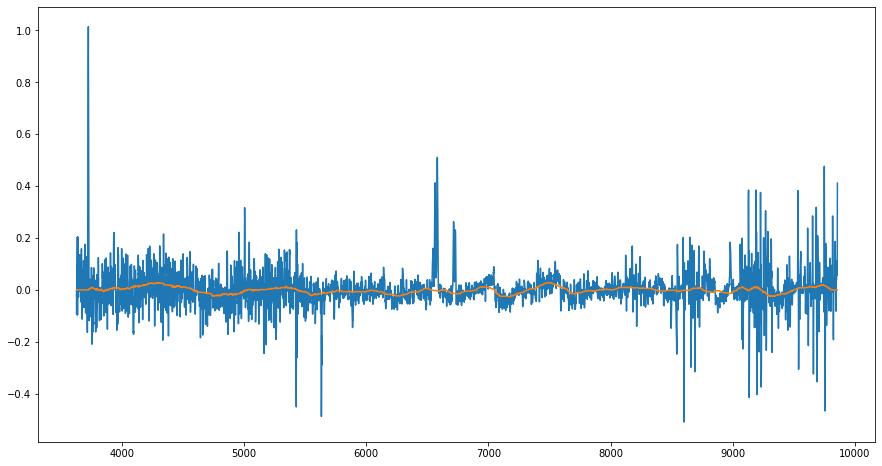

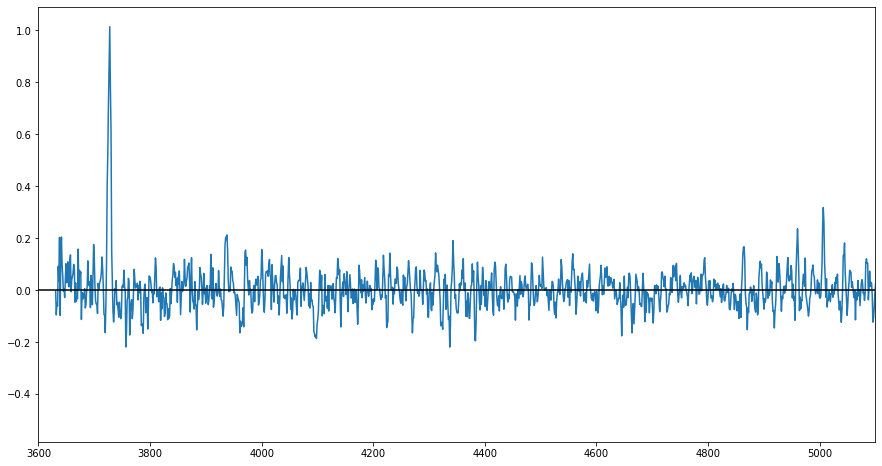

In [106]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/firefly_release/')
from run import firefly
from run import read_firefly
save=True
for spec in spectra:
    print (spec.meta_dict['FILENAME'])
    wave, flux, model_flux, params, og_data = read_firefly.main('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
    hdu_fit = fits.open('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
    fit_head=hdu_fit[1].header
#     fit data=hdu_fit[1].data
#     neb_emission = flux - model_flux

    #trimming edges to avoid bad parts of fit
    wave = wave[np.where(wave!=0)[0]]
    flux = flux[np.where(wave!=0)[0]]
    model_flux = model_flux[np.where(wave!=0)[0]]

    buff = 10
#         print (np.where(model_flux!=0)[0])
#         wave = wave[np.where(model_flux!=0)[0]]
#         flux = flux[np.where(model_flux!=0)[0]]
#         model_flux = model_flux[np.where(model_flux!=0)[0]]
    wave = wave[buff:-buff]
    flux = flux[buff:-buff]
    model_flux = model_flux[buff:-buff]

    waveb = wave[0]
    waver = wave[-1]

    wave_og = og_data[0][(og_data[0]>=waveb) &(og_data[0]<=waver)]
    flux_og = og_data[1][(og_data[0]>=waveb) &(og_data[0]<=waver)]
    
    spline=splrep(wave,model_flux,k=1)
    interp_model_flux=splev(wave_og,spline)
    
#     print (len(flux_og),len(flux),len(model_flux), len(interp_model_flux))
    plt.figure(figsize=[16,8])
    plt.plot(wave_og,flux_og)
    plt.plot(wave,flux)
    plt.plot(wave,model_flux)
    plt.plot(wave_og,interp_model_flux)
#     plt.xlim(3700,8000)
#     plt.xlim(6500,6800)
#     plt.ylim(0,.07)
    plt.show()

    neb_emission = flux_og - interp_model_flux

    meta_dict_spec = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0] +'-spec'}
    meta_dict_model = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0]+ '-model'}
    db_spec = UCSC_db.spectrum(wavelength=wave_og, flux=flux_og, meta_dict=meta_dict_spec)
#     db_spec_clipped = UCSC_db.spectrum(wavelength=wave, flux=flux, meta_dict=meta_dict_spec)
    db_spec_model = UCSC_db.spectrum(wavelength=wave_og, flux=interp_model_flux, meta_dict=meta_dict_model)
    UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [6400, 6800], plot_region = [3550, 7900], legend = True, rescale=False, cont_subtract=False)
    UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [6400, 6800], legend = False, rescale=False, cont_subtract=False)
    UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [4800, 5030], legend = False, rescale=False, cont_subtract=False)
    UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [3550, 4150], legend = False, rescale=False, cont_subtract=False)

    meta_dict_neb = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0]+ '-nebular'}
    db_spec_neb = UCSC_db.spectrum(wavelength=wave_og, flux=neb_emission, meta_dict=meta_dict_neb)
    UCSC_db.host_line_plots([db_spec_neb], 0, region = [6400, 6800], plot_region = [3550, 7900], legend = True, rescale=False)
    UCSC_db.host_line_plots([db_spec_neb], 0, region = [6400, 6800], legend = False, rescale=False)
    UCSC_db.host_line_plots([db_spec_neb], 0, region = [4800, 5030], legend = False, rescale=False)
    UCSC_db.host_line_plots([db_spec_neb], 0, region = [3550, 4150], legend = False, rescale=False)

    plt.figure(figsize=[15,8])
    flux_filt = scipy.signal.medfilt(db_spec_neb.flux, kernel_size=201)
    print ('Median continuum: ', np.median(db_spec.flux))
    print ('Median residual: ', np.median(np.absolute(flux_filt)))
    print ('Residual fraction: ', 100*np.median(np.absolute(flux_filt))/np.median(db_spec.flux), '%')
    plt.plot(db_spec_neb.wavelength, db_spec_neb.flux)
    plt.plot(db_spec_neb.wavelength, flux_filt)
    # plt.xlim(6000,8000)
#     plt.ylim(-.05,.05)
    plt.show()

    plt.figure(figsize=[15,8])
    final_neb_flux = db_spec_neb.flux - flux_filt
    plt.plot(db_spec_neb.wavelength, final_neb_flux)
    # plt.xlim(6000,8000)
#     plt.ylim(-.01,.105)
    plt.xlim(3600,5100)
    plt.axhline(y=0.0, color='k')
    plt.show()

    if save:
        outhdu=fits.PrimaryHDU([db_spec_neb.wavelength,final_neb_flux])
        hdul=fits.HDUList(outhdu)
        hdul[0].header=fit_head
        hdul[0].verify('fix') 
        hdul[0].header.set('redshift', z)
        for key in spec.meta_dict.keys():
            hdul[0].header.set(key, spec.meta_dict.get(key,'N/A'))
    #     hdul[0].header.set('ebv_host', ebv_gal)
    #     hdul[0].header.set('h_ratio',h_ratio)
        hdul.writeto('/Users/msiebert/Documents/UCSC/Research/Foundation_Hosts/analysis/host_nebular_emission_data/'+spec.meta_dict['FILENAME'].split('.fits')[0]+'-nebular.fits',overwrite=True)
        hdul.close()
        

SN2016afk-combined-20180207_ap9_6.803_rkron.fits
age: 10.48 Gyr
[Z/H]: -1.27 dex
log M/Msun: 10.21
E(B-V): 0.0 mag


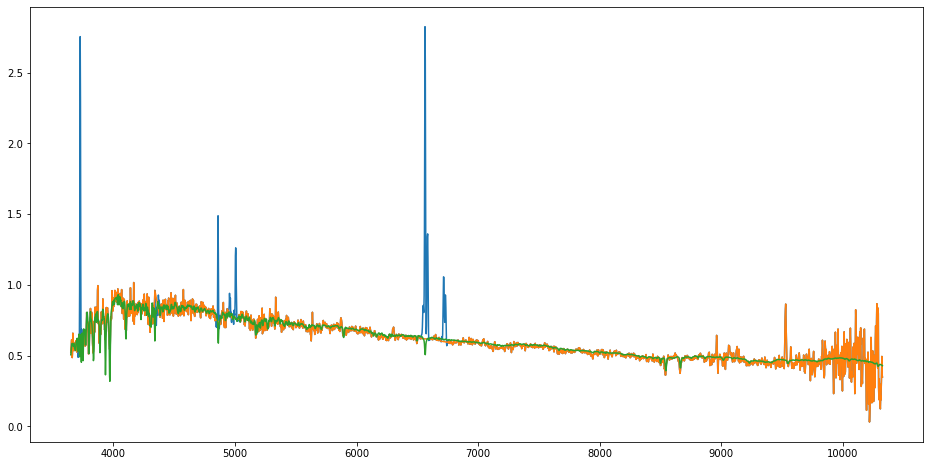

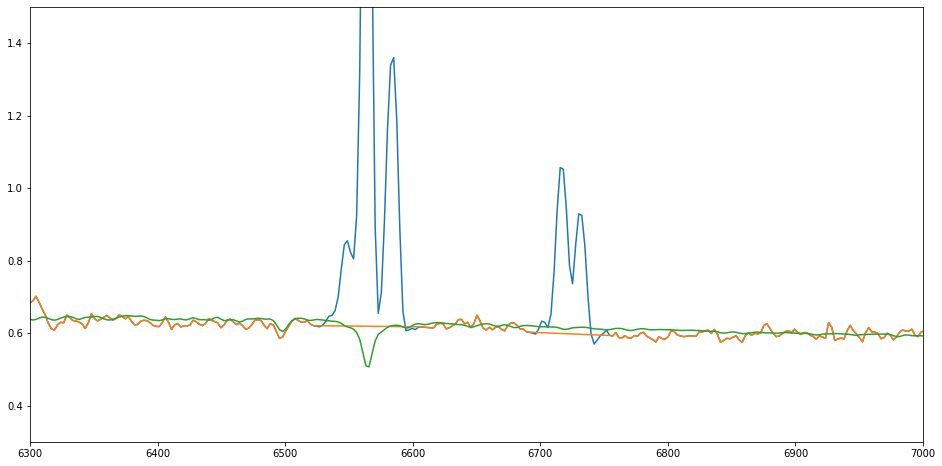

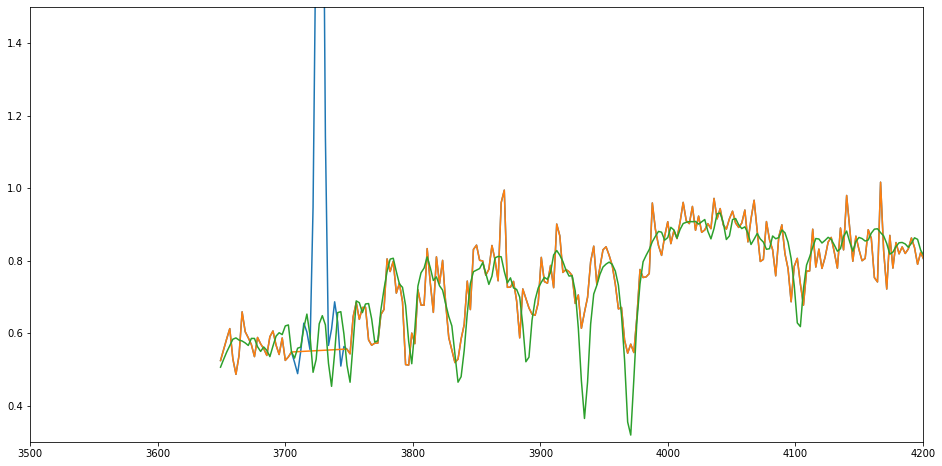

In [73]:
# os.chdir('/Users/msiebert/Documents/UCSC/Research/firefly_release/')
# from run import firefly
# from run import read_firefly
# save=True
# for spec in spectra:
#     if 'rkron' in spec.meta_dict['FILENAME'] and '_SN' not in spec.meta_dict['FILENAME']:
#         print (spec.meta_dict['FILENAME'])
#         wave, flux, model_flux, params, og_data = read_firefly.main('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
#         hdu_fit = fits.open('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
#         fit_head=hdu_fit[1].header
#     #     fit data=hdu_fit[1].data
#         neb_emission = flux - model_flux

#         #trimming edges to avoid bad parts of fit
#         wave = wave[np.where(wave!=0)[0]]
#         flux = flux[np.where(wave!=0)[0]]
#         model_flux = model_flux[np.where(wave!=0)[0]]

#         buff = 10
#     #         print (np.where(model_flux!=0)[0])
#     #         wave = wave[np.where(model_flux!=0)[0]]
#     #         flux = flux[np.where(model_flux!=0)[0]]
#     #         model_flux = model_flux[np.where(model_flux!=0)[0]]
#         wave = wave[buff:-buff]
#         flux = flux[buff:-buff]
#         model_flux = model_flux[buff:-buff]

#         waveb = wave[0]
#         waver = wave[-1]

#         wave_og = og_data[0][(og_data[0]>=waveb) &(og_data[0]<=waver)]
#         flux_og = og_data[1][(og_data[0]>=waveb) &(og_data[0]<=waver)]
#         plt.figure(figsize=[16,8])
#         plt.plot(wave_og,flux_og)
#         plt.plot(wave,flux)
#         plt.plot(wave,model_flux)
#     #         plt.xlim(3700,8000)
#     #         plt.ylim(.3,1.5)
#         plt.show()
#         plt.figure(figsize=[16,8])
#         plt.plot(wave_og,flux_og)
#         plt.plot(wave,flux)
#         plt.plot(wave,model_flux)
#         plt.xlim(6300,7000)
#         plt.ylim(.3,1.5)
#         plt.show()
#         plt.figure(figsize=[16,8])
#         plt.plot(wave_og,flux_og)
#         plt.plot(wave,flux)
#         plt.plot(wave,model_flux)
#         plt.xlim(3500,4200)
#         plt.ylim(.3,1.5)
#         plt.show()

In [63]:
#old code before clipping
# os.chdir('/Users/msiebert/Documents/UCSC/Research/firefly_release/')
# from run import firefly
# from run import read_firefly
# save=True
# for spec in spectra:
#     if '3.0_kpc' in spec.meta_dict['FILENAME'] and '_SN' not in spec.meta_dict['FILENAME']:
#         print (spec.meta_dict['FILENAME'])
#         wave, flux, model_flux, params = read_firefly.main('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
#         hdu_fit = fits.open('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
#         fit_head=hdu_fit[1].header
#     #     fit data=hdu_fit[1].data
#         neb_emission = flux - model_flux

#         meta_dict_spec = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0] +'-spec'}
#         meta_dict_model = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0]+ '-model'}
#         db_spec = UCSC_db.spectrum(wavelength=wave, flux=flux, meta_dict=meta_dict_spec)
#         db_spec_model = UCSC_db.spectrum(wavelength=wave, flux=model_flux, meta_dict=meta_dict_model)
#         UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [6400, 6800], plot_region = [3550, 7900], legend = True, rescale=False, cont_subtract=False)
#         UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [6400, 6800], legend = False, rescale=False, cont_subtract=False)
#         UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [4800, 5030], legend = False, rescale=False, cont_subtract=False)
#         UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [3550, 4150], legend = False, rescale=False, cont_subtract=False)

#         meta_dict_neb = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0]+ '-nebular'}
#         db_spec_neb = UCSC_db.spectrum(wavelength=wave, flux=neb_emission, meta_dict=meta_dict_neb)
#         UCSC_db.host_line_plots([db_spec_neb], 0, region = [6400, 6800], plot_region = [3550, 7900], legend = True, rescale=False)
#         UCSC_db.host_line_plots([db_spec_neb], 0, region = [6400, 6800], legend = False, rescale=False)
#         UCSC_db.host_line_plots([db_spec_neb], 0, region = [4800, 5030], legend = False, rescale=False)
#         UCSC_db.host_line_plots([db_spec_neb], 0, region = [3550, 4150], legend = False, rescale=False)

#         plt.figure(figsize=[15,8])
#         flux_filt = scipy.signal.medfilt(db_spec_neb.flux, kernel_size=201)
#         print ('Median continuum: ', np.median(db_spec.flux))
#         print ('Median residual: ', np.median(np.absolute(flux_filt)))
#         print ('Residual fraction: ', 100*np.median(np.absolute(flux_filt))/np.median(db_spec.flux), '%')
#         plt.plot(db_spec_neb.wavelength, db_spec_neb.flux)
#         plt.plot(db_spec_neb.wavelength, flux_filt)
#         # plt.xlim(6000,8000)
#     #     plt.ylim(-.05,.05)
#         plt.show()

#         plt.figure(figsize=[15,8])
#         final_neb_flux = db_spec_neb.flux - flux_filt
#         plt.plot(db_spec_neb.wavelength, final_neb_flux)
#         # plt.xlim(6000,8000)
#     #     plt.ylim(-.01,.105)
#         plt.xlim(3600,5100)
#         plt.axhline(y=0.0, color='k')
#         plt.show()

#     #     txt_header = 'wavelength flux fluxerr\n'
#     #     txt_header = txt_header + 'SN: {}\n'.format(spec.meta_dict['OBJECT'])
#     #     txt_header = txt_header + 'Age: {}\n'.format(params[0])
#     #     txt_header = txt_header + 'Stellar Z: {}\n'.format(params[1])
#     #     txt_header = txt_header + 'log M/Msun: {}\n'.format(params[2])
#     #     txt_header = txt_header + 'E(B-V): {}\n'.format(params[3])

#         if save:
#             outhdu=fits.PrimaryHDU([db_spec_neb.wavelength,final_neb_flux])
#             hdul=fits.HDUList(outhdu)
#             hdul[0].header=fit_head
#             hdul[0].verify('fix') 
#             hdul[0].header.set('redshift', z)
#             for key in spec.meta_dict.keys():
#                 hdul[0].header.set(key, spec.meta_dict.get(key,'N/A'))
#         #     hdul[0].header.set('ebv_host', ebv_gal)
#         #     hdul[0].header.set('h_ratio',h_ratio)
#             hdul.writeto('/Users/msiebert/Documents/UCSC/Research/Foundation_Hosts/analysis/host_nebular_emission_data/'+spec.meta_dict['FILENAME'].split('.fits')[0]+'-nebular.fits',overwrite=True)
#             hdul.close()
#     #     np.savetxt('/Users/msiebert/Documents/UCSC/Research/Foundation_Hosts/analysis/host_nebular_emission_data/'+spec.meta_dict['FILENAME'].split('.fits')[0]+'-nebular.flm',
#     #            np.transpose([db_spec_neb.wavelength,final_neb_flux]), header=txt_header)

In [5]:
test_query = "SELECT * from SPECTRA where FILENAME like '%combined%'"
spectra = UCSC_db.grab_all_spec_data(test_query)

2017hmf-combined-20180711_ap3_1.5_kpc.fits
2017hmf-combined-20180711_ap2_1.0_kpc_SN_BAD.fits
PS15cge-combined-20180711_ap4_1.5_kpc_SN_BAD.fits
PS15cge-combined-20180711_ap11_1.5_arcsec.fits
2017hmf-combined-20180711_ap5_2.0_kpc.fits
ASASSN15pr-combined-20180711_ap8_1.0_arcsec_SN.fits
PS15cge-combined-20180711_ap1_1.0_kpc_BAD.fits
2018dfy-combined-20180711_ap1.fits
2017hmf-combined-20180711_ap1_1.0_kpc_BAD.fits
PS15cge-combined-20180711_ap12_1.5_arcsec_SN.fits
ASASSN15pr-combined-20180711_ap9_1.5_arcsec.fits
2017hmf-combined-20180711_ap12_4.25_rkron.fits
2018bdm-combined-20180711_ap1.fits
PS15cge-combined-20180711_ap3_1.5_kpc_BAD.fits
2017hmf-combined-20180711_ap4_1.5_kpc_SN.fits
PS15cge-combined-20180711_ap15_3.0_arcsec.fits
PS15cge-combined-20180711_ap16_3.0_arcsec_SN.fits
2017hmf-combined-20180711_ap10_2.0_arcsec.fits
PS15cge-combined-20180711_ap8_3.0_kpc_SN.fits
2017hmf-combined-20180711_ap6_3.0_kpc.fits
ASASSN15pr-combined-20180711_ap7_1.0_arcsec.fits
2018cdc-combined-20180711_ap1.

2017gfl-combined-20180611_ap16_9.47_rkron.fits
age: 6.35 Gyr
[Z/H]: -0.66 dex
log M/Msun: 10.36
E(B-V): 0.0 mag


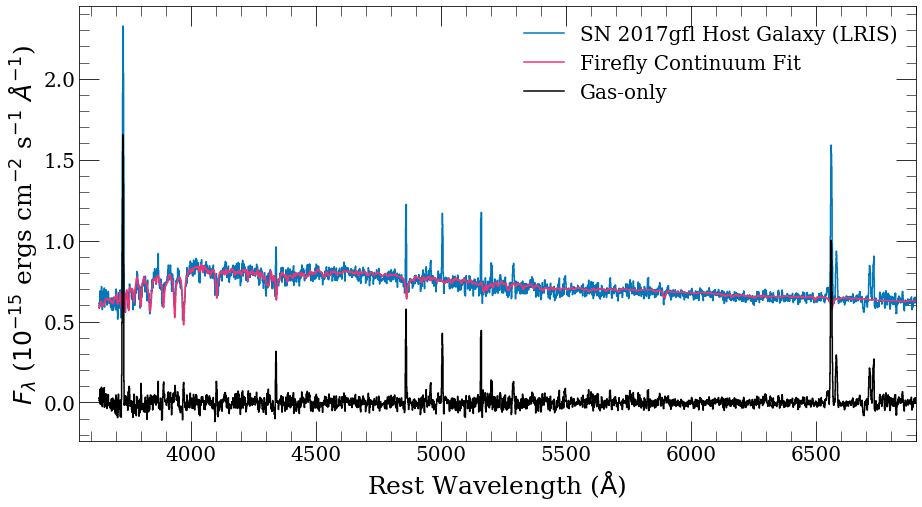

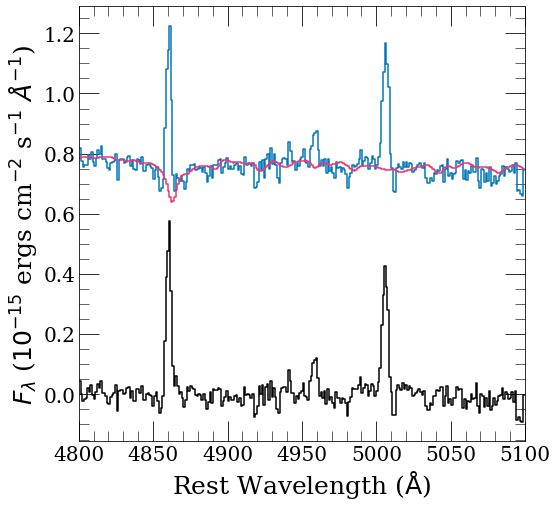

In [175]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/firefly_release/')
from run import firefly
from run import read_firefly
save=True
for spec in spectra:
    if 'rkron' in spec.meta_dict['FILENAME']:
        print (spec.meta_dict['FILENAME'])
        wave, flux, model_flux, params, og_data = read_firefly.main('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
        hdu_fit = fits.open('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
        fit_head=hdu_fit[1].header
    #     fit data=hdu_fit[1].data
    #     neb_emission = flux - model_flux

        #trimming edges to avoid bad parts of fit
        wave = wave[np.where(wave!=0)[0]]
        flux = flux[np.where(wave!=0)[0]]
        model_flux = model_flux[np.where(wave!=0)[0]]

        buff = 10
    #         print (np.where(model_flux!=0)[0])
    #         wave = wave[np.where(model_flux!=0)[0]]
    #         flux = flux[np.where(model_flux!=0)[0]]
    #         model_flux = model_flux[np.where(model_flux!=0)[0]]
        wave = wave[buff:-buff]
        flux = flux[buff:-buff]
        model_flux = model_flux[buff:-buff]

        waveb = wave[0]
        waver = wave[-1]

        wave_og = og_data[0][(og_data[0]>=waveb) &(og_data[0]<=waver)]
        flux_og = og_data[1][(og_data[0]>=waveb) &(og_data[0]<=waver)]

        spline=splrep(wave,model_flux,k=1)
        interp_model_flux=splev(wave_og,spline)

    #     print (len(flux_og),len(flux),len(model_flux), len(interp_model_flux))
#         plt.figure(figsize=[16,8])
#         plt.plot(wave_og,flux_og)
#         plt.plot(wave,flux)
#         plt.plot(wave,model_flux)
#         plt.plot(wave_og,interp_model_flux)
#     #     plt.xlim(3700,8000)
#     #     plt.xlim(6500,6800)
#     #     plt.ylim(0,.07)
#         plt.show()

        neb_emission = flux_og - interp_model_flux

        meta_dict_spec = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0] +'-spec'}
        meta_dict_model = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0]+ '-model'}
        db_spec = UCSC_db.spectrum(wavelength=wave_og, flux=flux_og, meta_dict=meta_dict_spec)
        db_spec_neb = UCSC_db.spectrum(wavelength=wave_og, flux=neb_emission, meta_dict=meta_dict_neb)
    #     db_spec_clipped = UCSC_db.spectrum(wavelength=wave, flux=flux, meta_dict=meta_dict_spec)
        db_spec_model = UCSC_db.spectrum(wavelength=wave_og, flux=interp_model_flux, meta_dict=meta_dict_model)
        UCSC_db.host_line_plots_fancy([db_spec, db_spec_model], 0, neb = db_spec_neb, region = [6400, 6900], plot_region = [3550, 6900], 
                                      legend = True, rescale=False, cont_subtract=False, save=True)
        UCSC_db.host_line_plots_fancy([db_spec, db_spec_model], 0, neb = db_spec_neb, region = [6400, 6900], plot_region = [4800, 5100], 
                                      legend = False, size = [8,8], rescale=False, cont_subtract=False, save=True, suf = 'Hbeta')
#         UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [6400, 6800], plot_region = [3550, 7900], legend = True, rescale=False, cont_subtract=False) 

In [176]:
print (fit_head)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   48 / length of dimension 1                          NAXIS2  =                 5815 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    6 / number of table fields                         TTYPE1  = 'wavelength'                                                          TFORM1  = 'D       '                                                            TUNIT1  = 'Angstrom'                                                            TTYPE2  = 'original_data'                                                       TFORM2  = 'D       '                    